### Import Required Libraries

In [1]:
# Libraries to process file and visualization for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display full view of columns without truncate
pd.options.display.max_columns = None

In [2]:
# Library version
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)

Numpy Version:  2.3.3
Pandas Version:  2.3.2


### Import Dataset

In [3]:
# Import dataset file and get panda dataframe. Also copy original dataframe to future reference.
dataset = pd.read_csv("Gujarat_Rainfall.csv")
dataset_original = dataset.copy()

### Summary of Dataset
This dataset is a comprehensive collection of historical weather data for `Gujarat` state in India. It includes information on the amount of rainfall recorded each day from the `8th DEC 2015` to the `10th FEB 2025`, allowing for a detailed analysis of precipitation patterns across different districts in Gujarat. This dataset contains 15 columns such as date of record, month, season, station name (exact location), state, district, average temperature, minimum temperature, maximum temperature, wind speed, air pressure, elevation, latitude, longitude, rainfall in mm.

In [4]:
# check total number of rows and columns
dataset.shape

(61988, 15)

In [5]:
# Check first five rows 
dataset.head()

date_of_record     month  season station_name state     district  avg_temp  \
0     2015-12-08  December  Winter        Deesa    GJ  Banaskantha      26.4   
1     2015-12-09  December  Winter        Deesa    GJ  Banaskantha      25.6   
2     2015-12-10  December  Winter        Deesa    GJ  Banaskantha      25.2   
3     2015-12-11  December  Winter        Deesa    GJ  Banaskantha      21.5   
4     2015-12-12  December  Winter        Deesa    GJ  Banaskantha      20.8   

   min_temp  max_temp  wind_speed  air_pressure  elevation  latitude  \
0      14.6      32.7         NaN           NaN        135      24.2   
1      15.6      30.0         NaN           NaN        135      24.2   
2      16.6      30.0         NaN           NaN        135      24.2   
3      13.4      25.6         NaN           NaN        135      24.2   
4      10.2      26.2         NaN           NaN        135      24.2   

   longitude  rainfall  
0       72.2       NaN  
1       72.2       NaN  
2       72.2       NaN  
3       72.2       NaN  
4       72.2       NaN

### Columns Description
- `date_of_record` - The specific date on which the weather observations were recorded (in `YYYY-MM-DD` format).

- `month` - The month extracted from the date, useful for monthly trend analysis.

- `season` - The meteorological season corresponding to the date — typically `Winter (Dec–Feb)`, `Pre-Monsoon (Mar–May)`, `Monsoon (Jun–Sep)`, or `Post-Monsoon (Oct–Nov)` for India.

- `station_name` - The name of the weather station where the data was collected. Each station corresponds to a specific geographical location.

- `state` - The Indian state or union territory where the weather station is located.

- `district` - The district (administrative division) within the state where the weather station operates.

- `avg_temp` - The average daily temperature recorded at the station, measured in degrees Celsius (°C).

- `min_temp` - The minimum temperature observed during the day (°C).

- `max_temp` - The maximum temperature observed during the day (°C).  

- `wind_speed` - The wind speed recorded at the station, measured in kilometers per hour (km/h).

- `air_pressure` - The atmospheric pressure measured at the station, measured in hectopascals (hPa) or millibars (mb).

- `elevation` - The height above sea level of the weather station, measured in meters (m) — affects temperature and pressure readings.

- `latitude` - The geographical latitude (in decimal degrees) of the station, indicating its north–south position on the Earth.

- `longitude` - The geographical longitude (in decimal degrees) of the station, indicating its east–west position on the Earth.

- `rainfall` - The total rainfall measured during the day, measured in millimeters (mm).

In [6]:
# check all available columns
dataset.columns

Index(['date_of_record', 'month', 'season', 'station_name', 'state',
       'district', 'avg_temp', 'min_temp', 'max_temp', 'wind_speed',
       'air_pressure', 'elevation', 'latitude', 'longitude', 'rainfall'],
      dtype='object')

In [7]:
# Check last five rows
dataset.tail()

date_of_record     month  season     station_name state district  \
61983     2025-02-06  February  Winter  Surat / Magdala    GJ    Surat   
61984     2025-02-07  February  Winter  Surat / Magdala    GJ    Surat   
61985     2025-02-08  February  Winter  Surat / Magdala    GJ    Surat   
61986     2025-02-09  February  Winter  Surat / Magdala    GJ    Surat   
61987     2025-02-10  February  Winter  Surat / Magdala    GJ    Surat   

       avg_temp  min_temp  max_temp  wind_speed  air_pressure  elevation  \
61983      24.3      17.0      31.0        20.2        1012.3          5   
61984      25.5      19.0      33.0        14.4        1012.6          5   
61985      25.3      17.0      33.0         9.8        1012.3          5   
61986      25.3      17.0      34.0         8.3        1011.8          5   
61987      24.6      17.0      30.7        14.0        1013.0          5   

       latitude  longitude  rainfall  
61983   21.1141    72.7418       0.0  
61984   21.1141    72.7418       0.0  
61985   21.1141    72.7418       0.0  
61986   21.1141    72.7418       0.0  
61987   21.1141    72.7418       0.0

In [8]:
# Check random five rows
dataset.sample(5)

date_of_record      month   season        station_name state  \
11454     2021-06-03       June   Summer          New Kandla    GJ   
3184      2017-01-17    January   Winter              Naliya    GJ   
18744     2021-03-21      March   Winter         Gandhinagar    GJ   
3779      2018-09-04  September  Monsoon              Naliya    GJ   
33634     2022-03-05      March   Winter  Vallabh Vidyanagar    GJ   

          district  avg_temp  min_temp  max_temp  wind_speed  air_pressure  \
11454      Kachchh      31.1      28.4      39.6        24.5        1005.6   
3184       Kachchh      17.3       8.8      26.2         NaN           NaN   
18744  Gandhinagar      30.6      22.3      39.3         3.2        1007.1   
3779       Kachchh      28.4      26.2      31.8         NaN           NaN   
33634        Anand      26.3      20.0      34.7        11.1        1012.8   

       elevation  latitude  longitude  rainfall  
11454         10   23.0000    70.2167       0.0  
3184          20   23.2500    68.8500       NaN  
18744          0   23.2333    72.7167       NaN  
3779          20   23.2500    68.8500       0.0  
33634         41   22.5667    72.9333       0.0

In [9]:
# check all columns datatypes also observe non-null values.
dataset.info()

# -------------------------------------------------------------------------------------------
# Observation :
# 1) There are total 61988 records available, range from 0 to 61987.
# 2) All columns except "date_of_record" are in correct datatype. convert "date_of_record" in datetime datatype. 
# 3) The "state" column we can remove. because, this dataset only for Gujarat state.
# 4) There are missing values in min_temp, max_temp, wind_speed, air_pressure, rainfall.
# -------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61988 entries, 0 to 61987
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_of_record  61988 non-null  object 
 1   month           61988 non-null  object 
 2   season          61988 non-null  object 
 3   station_name    61988 non-null  object 
 4   state           61988 non-null  object 
 5   district        61988 non-null  object 
 6   avg_temp        61988 non-null  float64
 7   min_temp        60131 non-null  float64
 8   max_temp        50259 non-null  float64
 9   wind_speed      39895 non-null  float64
 10  air_pressure    39474 non-null  float64
 11  elevation       61988 non-null  int64  
 12  latitude        61988 non-null  float64
 13  longitude       61988 non-null  float64
 14  rainfall        40122 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 7.1+ MB


### Checking Missing Values

In [10]:
# Get total missing values and it's percentages

total_missing = dataset.isnull().sum()
percentage_missing = np.round((total_missing * 100) / len(dataset), 2)

missing_value_df = pd.DataFrame([total_missing, percentage_missing], index=["Total_Missing", "%_Missing"]).T
missing_value_df

# -------------------------------------------------------------------------------------------
# Observation :
# 1) Here, we have missing values in dataset. columns 'min_temp' and 'max_temp' have 3% and 18.92% missing values resp.
# 2) columns 'wind_speed', 'air_pressure' and 'rainfall' have 35.64% , 36.32% , 35.27% missing values resp.
# 3) Columns with missing values 25% or greater need to drop respective column.
# 4) In imputation if variable is char then we will use mode function and if it is numeric then we will first check for outrliers if there are outrliers then we will impute by median else we will impute using mean.
# -------------------------------------------------------------------------------------------

Total_Missing  %_Missing
date_of_record            0.0       0.00
month                     0.0       0.00
season                    0.0       0.00
station_name              0.0       0.00
state                     0.0       0.00
district                  0.0       0.00
avg_temp                  0.0       0.00
min_temp               1857.0       3.00
max_temp              11729.0      18.92
wind_speed            22093.0      35.64
air_pressure          22514.0      36.32
elevation                 0.0       0.00
latitude                  0.0       0.00
longitude                 0.0       0.00
rainfall              21866.0      35.27

In [11]:
dataset[dataset["wind_speed"].isnull()]

date_of_record      month   season     station_name state     district  \
0         2015-12-08   December   Winter            Deesa    GJ  Banaskantha   
1         2015-12-09   December   Winter            Deesa    GJ  Banaskantha   
2         2015-12-10   December   Winter            Deesa    GJ  Banaskantha   
3         2015-12-11   December   Winter            Deesa    GJ  Banaskantha   
4         2015-12-12   December   Winter            Deesa    GJ  Banaskantha   
...              ...        ...      ...              ...   ...          ...   
61826     2024-08-30     August  Monsoon  Surat / Magdala    GJ        Surat   
61827     2024-08-31     August  Monsoon  Surat / Magdala    GJ        Surat   
61828     2024-09-01  September  Monsoon  Surat / Magdala    GJ        Surat   
61829     2024-09-03  September  Monsoon  Surat / Magdala    GJ        Surat   
61830     2024-09-04  September  Monsoon  Surat / Magdala    GJ        Surat   

       avg_temp  min_temp  max_temp  wind_speed  air_pressure  elevation  \
0          26.4      14.6      32.7         NaN           NaN        135   
1          25.6      15.6      30.0         NaN           NaN        135   
2          25.2      16.6      30.0         NaN           NaN        135   
3          21.5      13.4      25.6         NaN           NaN        135   
4          20.8      10.2      26.2         NaN           NaN        135   
...         ...       ...       ...         ...           ...        ...   
61826      28.9      26.6       NaN         NaN           NaN          5   
61827      29.1      26.5       NaN         NaN           NaN          5   
61828      29.5      26.4       NaN         NaN           NaN          5   
61829      26.8      24.8       NaN         NaN           NaN          5   
61830      28.3      25.2       NaN         NaN           NaN          5   

       latitude  longitude  rainfall  
0       24.2000    72.2000       NaN  
1       24.2000    72.2000       NaN  
2       24.2000    72.2000       NaN  
3       24.2000    72.2000       NaN  
4       24.2000    72.2000       NaN  
...         ...        ...       ...  
61826   21.1141    72.7418       5.1  
61827   21.1141    72.7418       0.3  
61828   21.1141    72.7418       0.0  
61829   21.1141    72.7418      39.1  
61830   21.1141    72.7418      17.0  

[22093 rows x 15 columns]

### Check Statistical Measure for Numerical Columns

In [12]:
# Mean and Median(50%) difference is more than 10% then there are possible outliers present in data.
dataset.describe(include="number").T

# -------------------------------------------------------------------------------------------
# Observation :
# 1) In 'elevation' column, mean and median difference is more than 10% then there are possible outliers present in column.
# -------------------------------------------------------------------------------------------

count         mean        std       min        25%        50%  \
avg_temp      61988.0    27.370825   4.000929   12.2000    24.9000    28.0000   
min_temp      60131.0    22.313973   5.049992    1.4000    18.6000    24.0000   
max_temp      50259.0    32.846710   4.183345   18.6000    30.0000    32.5000   
wind_speed    39895.0    13.069522   6.229127    0.0000     8.7000    11.9000   
air_pressure  39474.0  1008.846887   5.191823  988.8000  1004.9000  1009.1000   
elevation     61988.0    32.506227  41.338043    0.0000     5.0000    10.0000   
latitude      61988.0    22.247595   0.937981   20.6167    21.3167    22.3667   
longitude     61988.0    71.169081   1.480146   68.8500    69.6667    70.9167   
rainfall      40122.0     3.747032  14.931792    0.0000     0.0000     0.0000   

                    75%        max  
avg_temp        29.9000    40.9000  
min_temp        26.2000    31.8000  
max_temp        35.2000    50.3000  
wind_speed      16.1000    65.4000  
air_pressure  1013.2000  1022.6000  
elevation       50.0000   135.0000  
latitude        23.0667    24.2000  
longitude       72.7167    73.2667  
rainfall         0.7000   485.9000

In [13]:
temp_df = dataset.describe().T

temp_df["mean_median_diff"] = (np.abs(temp_df["mean"] - temp_df["50%"]) * 100) / (temp_df["50%"])

temp_df[(temp_df["mean_median_diff"] != float("inf")) & (temp_df["mean_median_diff"] > 10)]

count       mean        std  min  25%   50%   75%    max  \
elevation  61988.0  32.506227  41.338043  0.0  5.0  10.0  50.0  135.0   

           mean_median_diff  
elevation         225.06227

In [14]:
dataset.describe(include="O").T

count unique             top   freq
date_of_record  61988   3694      2025-02-10     25
month           61988     12         January   5898
season          61988      4          Winter  21312
station_name    61988     25  Bhuj-Rudramata   3691
state           61988      1              GJ  61988
district        61988     17         Kachchh  10014

### Check Duplicate Records

In [15]:
dataset.duplicated().sum()

# -------------------------------------------------------------------------------------------
# Observation :
# 1) There is no duplicated entries in dataset.
# -------------------------------------------------------------------------------------------

np.int64(0)

### Types of Columns
- Numerical - avg_temp, min_temp, max_temp, wind_speed, air_pressure, elevation, latitude, longitude, rainfall.
- Categorical - month, season, station_name, state, district.
- Datatime - date_of_record.

In [16]:
# convert 'date_of_record' to datetime datatype.
dataset["date_of_record"] = pd.to_datetime(dataset["date_of_record"])

In [17]:
# Extract cols with respective data types.
numeric_cols = dataset.select_dtypes(include="number").columns
categorical_cols = dataset.select_dtypes(include=["object"]).columns
datetime_cols = dataset.select_dtypes(include="datetime").columns

### Univariate Analysis for Numerical Columns

In [18]:
# univariate analysis for numerical columns. here, we view the descriptive statistics, skewness, histplot, boxplot for respective column.
def numerical_univariate(dataset, column):
    """
    Plot histogram + KDE and boxplot for a numeric column,
    and print descriptive statistics including skewness.
    """
    print("-"*100)
    print(f"Feature Name: {column}", end="\n\n")
    
    # 1. Print descriptive stats
    print("Descriptive Statistics:")
    print(dataset[column].describe())
    print(f"\nSkewness: {dataset[column].skew()}")

    # 2. Create plots
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Histogram + KDE
    sns.histplot(dataset[column], kde=True, ax=ax[0])
    ax[0].set_title(f"Distribution of {column}")
    ax[0].set_xlabel("")  

    # Boxplot
    sns.boxplot(x=dataset[column], ax=ax[1], orient="h")

    # Layout
    plt.tight_layout()
    plt.show()


----------------------------------------------------------------------------------------------------
Feature Name: avg_temp

Descriptive Statistics:
count    61988.000000
mean        27.370825
std          4.000929
min         12.200000
25%         24.900000
50%         28.000000
75%         29.900000
max         40.900000
Name: avg_temp, dtype: float64

Skewness: -0.4087638751023951


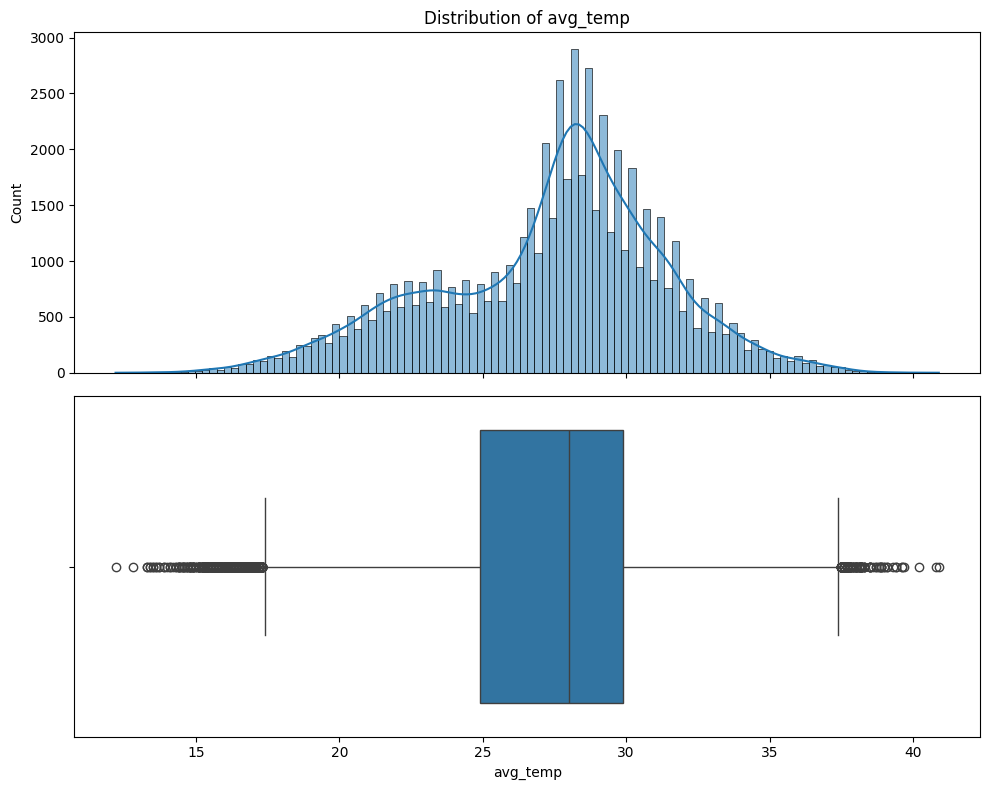

----------------------------------------------------------------------------------------------------
Feature Name: min_temp

Descriptive Statistics:
count    60131.000000
mean        22.313973
std          5.049992
min          1.400000
25%         18.600000
50%         24.000000
75%         26.200000
max         31.800000
Name: min_temp, dtype: float64

Skewness: -0.7490006485533648


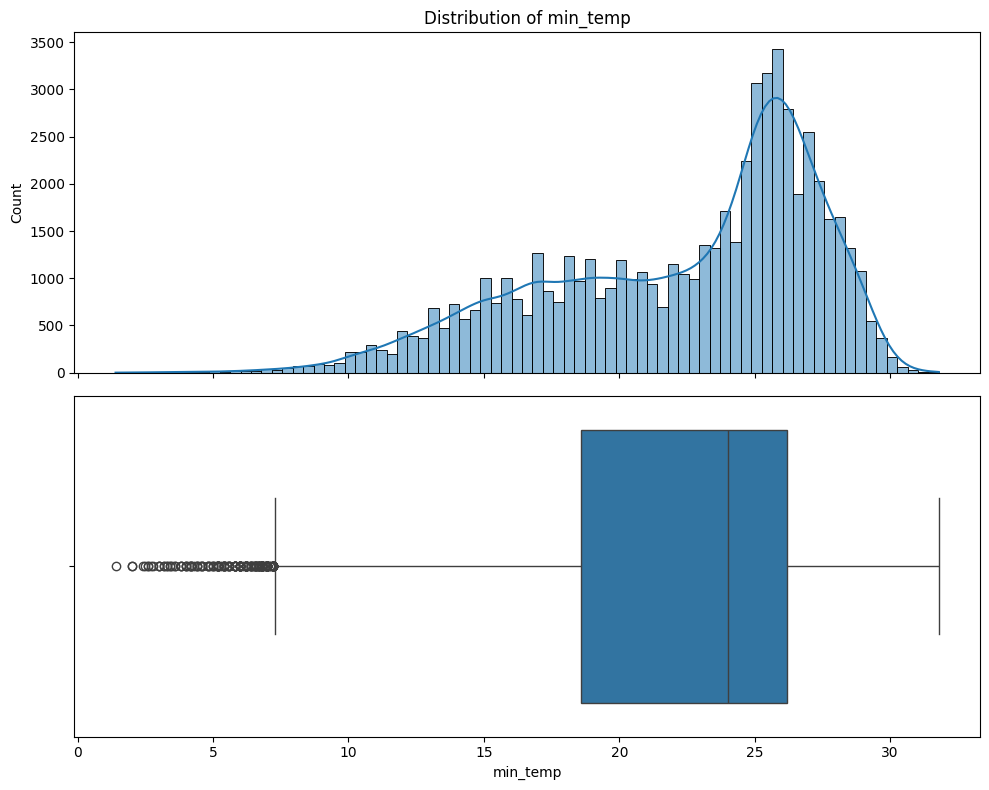

----------------------------------------------------------------------------------------------------
Feature Name: max_temp

Descriptive Statistics:
count    50259.000000
mean        32.846710
std          4.183345
min         18.600000
25%         30.000000
50%         32.500000
75%         35.200000
max         50.300000
Name: max_temp, dtype: float64

Skewness: 0.34522737076621923


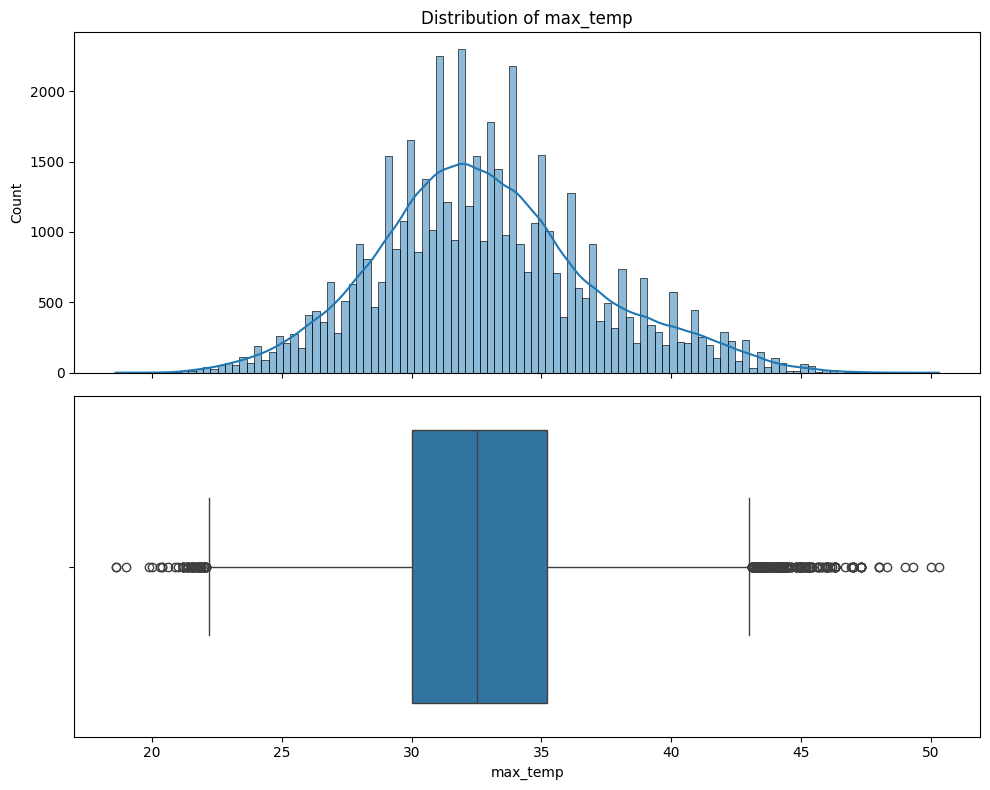

----------------------------------------------------------------------------------------------------
Feature Name: wind_speed

Descriptive Statistics:
count    39895.000000
mean        13.069522
std          6.229127
min          0.000000
25%          8.700000
50%         11.900000
75%         16.100000
max         65.400000
Name: wind_speed, dtype: float64

Skewness: 1.2680159514947957


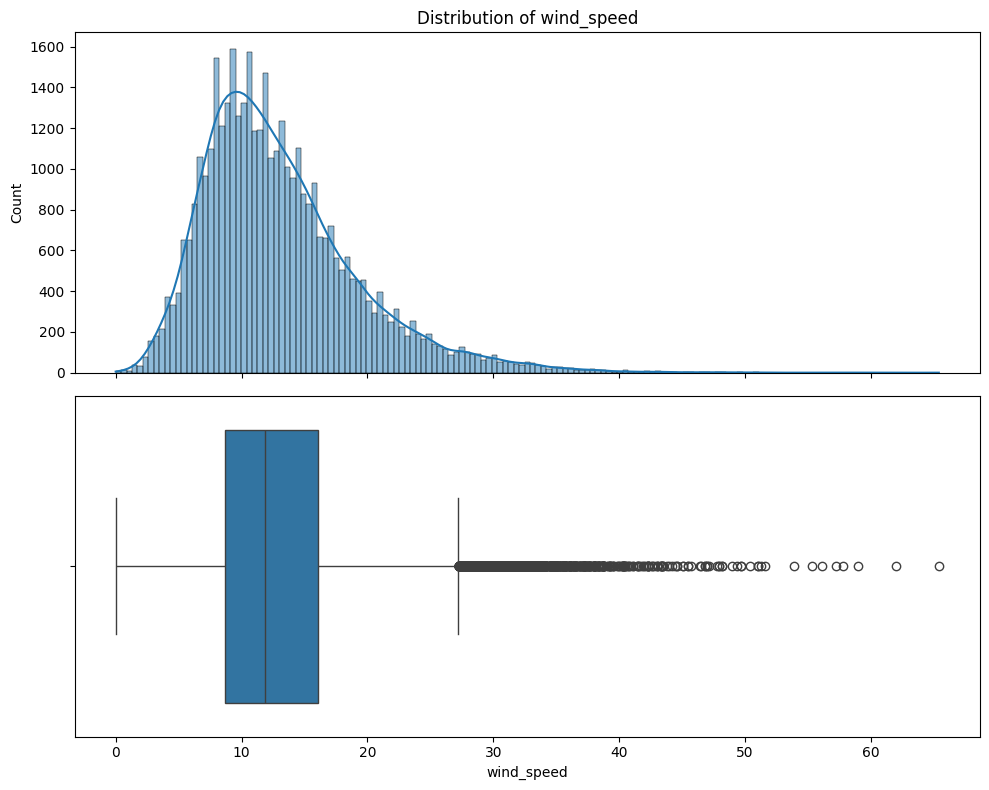

----------------------------------------------------------------------------------------------------
Feature Name: air_pressure

Descriptive Statistics:
count    39474.000000
mean      1008.846887
std          5.191823
min        988.800000
25%       1004.900000
50%       1009.100000
75%       1013.200000
max       1022.600000
Name: air_pressure, dtype: float64

Skewness: -0.2879130609177978


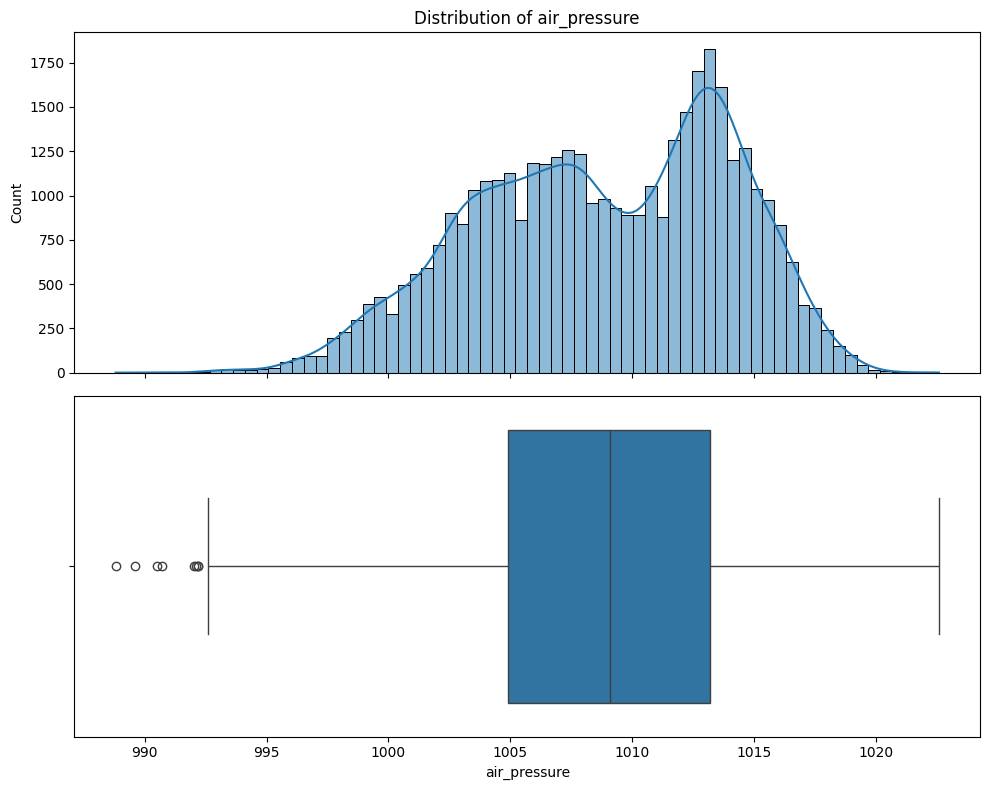

----------------------------------------------------------------------------------------------------
Feature Name: elevation

Descriptive Statistics:
count    61988.000000
mean        32.506227
std         41.338043
min          0.000000
25%          5.000000
50%         10.000000
75%         50.000000
max        135.000000
Name: elevation, dtype: float64

Skewness: 1.5103554990949737


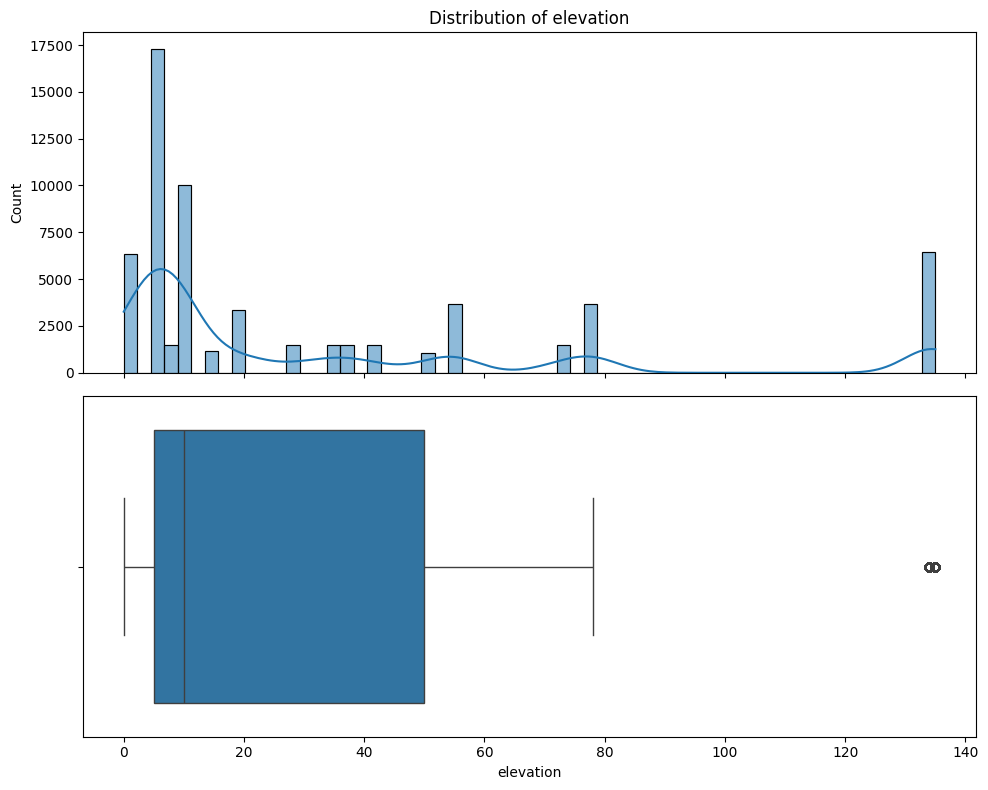

----------------------------------------------------------------------------------------------------
Feature Name: latitude

Descriptive Statistics:
count    61988.000000
mean        22.247595
std          0.937981
min         20.616700
25%         21.316700
50%         22.366700
75%         23.066700
max         24.200000
Name: latitude, dtype: float64

Skewness: 0.018522857150923534


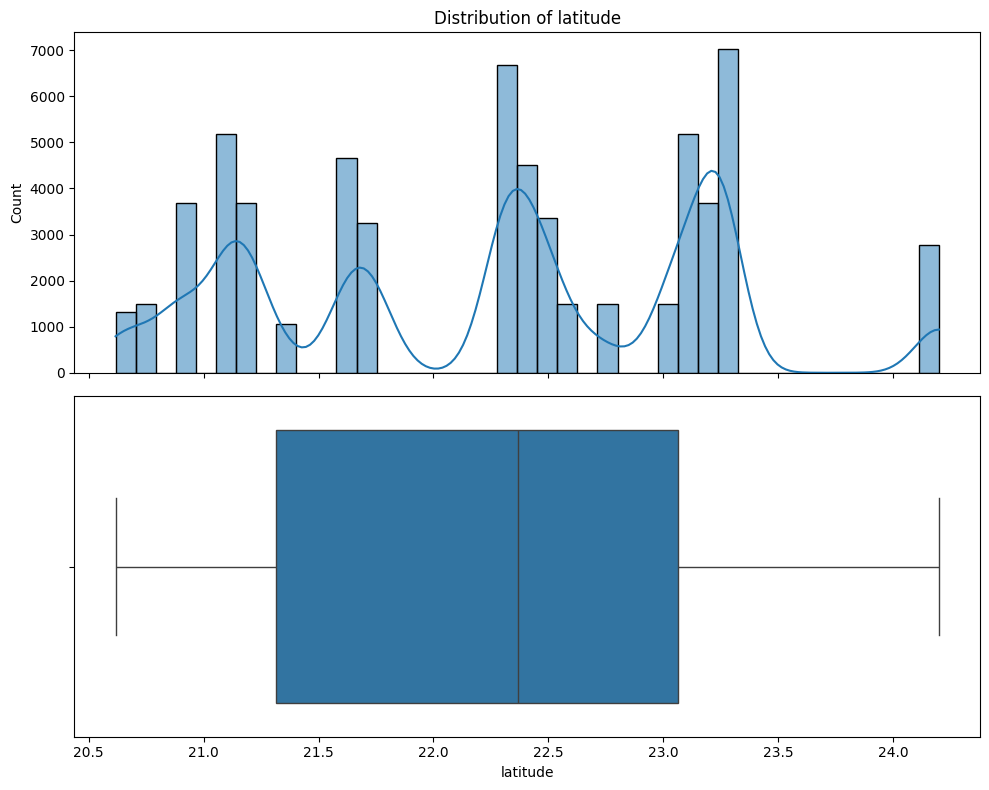

----------------------------------------------------------------------------------------------------
Feature Name: longitude

Descriptive Statistics:
count    61988.000000
mean        71.169081
std          1.480146
min         68.850000
25%         69.666700
50%         70.916700
75%         72.716700
max         73.266700
Name: longitude, dtype: float64

Skewness: -0.12874039654194594


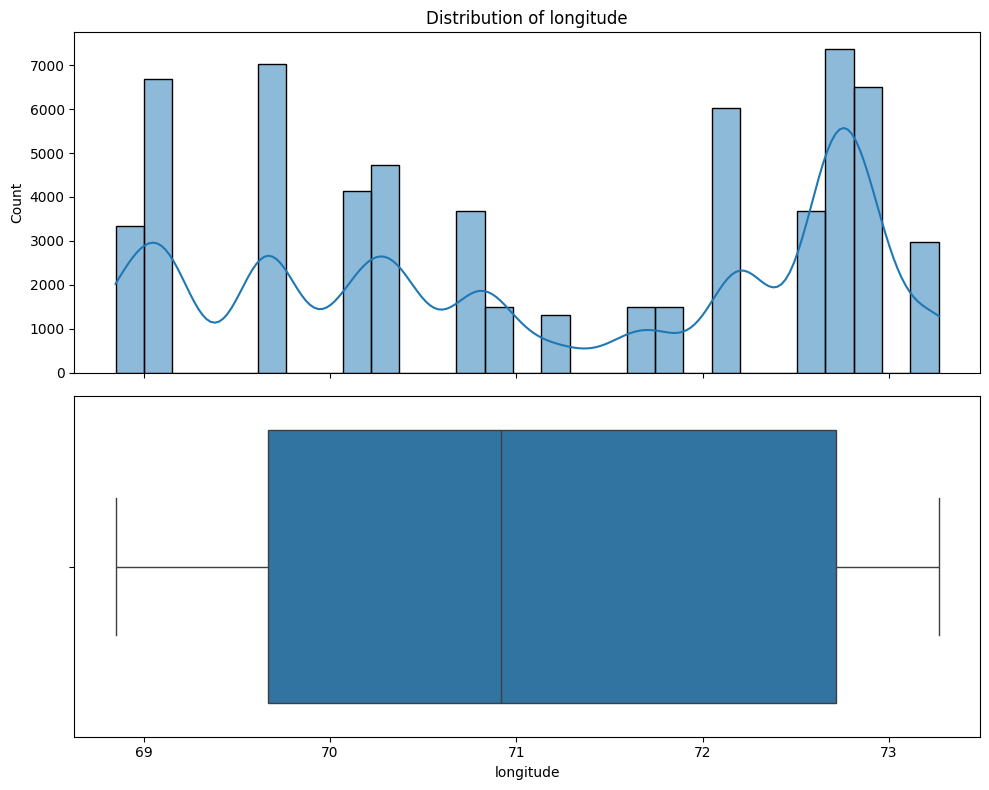

----------------------------------------------------------------------------------------------------
Feature Name: rainfall

Descriptive Statistics:
count    40122.000000
mean         3.747032
std         14.931792
min          0.000000
25%          0.000000
50%          0.000000
75%          0.700000
max        485.900000
Name: rainfall, dtype: float64

Skewness: 9.258199036645395


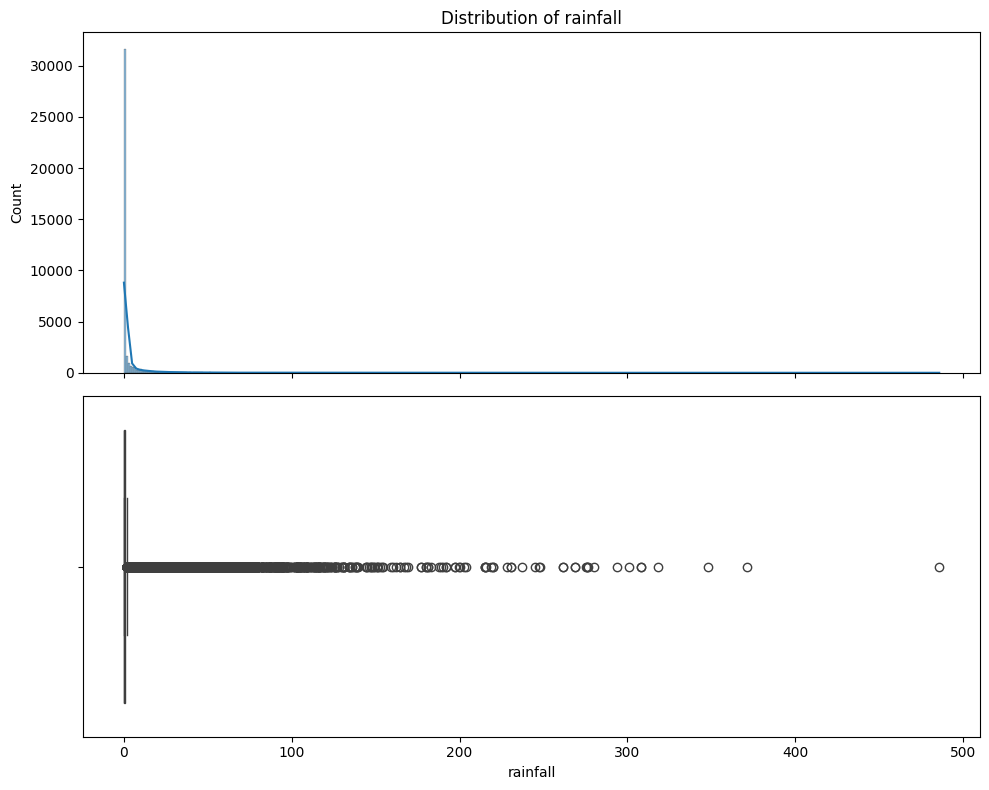

In [19]:
for col in numeric_cols:
    numerical_univariate(dataset, col)


# -------------------------------------------------------------------------------------------
# Observation :

# feature name : 'avg_temp'
# 1) mean and median value close to each other that means less possible of outliers.
# 2) skewness approx -0.4 i.e. data is slightly left skewed.
# 3) avg_temp most values in range 23 to 32.
# 4) In boxplot, values less than 17 and values greater than 37 are consider outliers.

# feature name : 'min_temp'
# 1) mean and median value close to each other that means less possible of outliers.
# 2) skewness value -0.75 i.e. data is slightly left skewed.
# 3) In boxplot, values less than 8 are consider as outliers.

# feature name : 'max_temp'
# 1) mean and median values are very close to each other i.e. less possible of outliers.
# 2) skewness 0.34 i.e. data slightly right skewed.
# 3) In boxplot, values less than 22 and values greater than 43 are consider as outliers.

# feature name : 'wind_speed'
# 1) Difference between mean and median not much but difference between 75% and max value is greater. so, may be outliers possible.
# 2) skewness 1.26 i.e. data is right skewed.

# feature name : 'air_pressure'
# 1) mean and median is close to each other may be no or less outliers.
# 2) skewness -0.28 slightly left skewed and data distribution looks like bimodal.

# feature name : 'elevation'
# 1) mean and median difference is not close to each other, may be outliers possible.
# 2) skewness is about 1.51 and distribution looks like multimodal.

# feature name : 'rainfall'
# 1) Too much missing values are present in this column.
# 2) min, 25%, 50% are directly 0.
# 3) 75% and max value has large difference. so, may be possible outliers.

# -------------------------------------------------------------------------------------------

### Univariate Analysis for Categorical Columns

In [20]:
# view categorical columns
categorical_cols

Index(['month', 'season', 'station_name', 'state', 'district'], dtype='object')

In [21]:
def categorical_univariate(dataset, column):
    """
    Visualize and summarize a categorical feature:
    - Print frequency counts and missing values
    - Plot a countplot and a pie chart
    """
    print("-" * 100)
    print(f"Feature Name: {column}\n")

    # 1. Print descriptive stats
    print("Value Counts:")
    print(dataset[column].value_counts(dropna=False))
    print(f"\nMissing Values: {dataset[column].isnull().sum()}")

    # 2. Create plots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Countplot (bar chart)
    sns.countplot(x=column, data=dataset, ax=ax[0], order=dataset[column].value_counts().index)
    ax[0].set_title(f"Countplot of {column}")
    ax[0].set_xlabel(column)
    ax[0].set_ylabel("Count")
    ax[0].tick_params(axis='x', rotation=45)

    # Pie chart
    dataset[column].value_counts(dropna=False).plot.pie(
        autopct='%1.1f%%', ax=ax[1], startangle=90, cmap='tab20'
    )
    ax[1].set_ylabel("") 
    ax[1].set_title(f"Pie Chart of {column}")

    plt.tight_layout()
    plt.show()


----------------------------------------------------------------------------------------------------
Feature Name: month

Value Counts:
month
January      5898
December     5334
July         5228
October      5198
August       5181
May          5155
March        5138
November     5051
June         5021
September    4962
February     4942
April        4880
Name: count, dtype: int64

Missing Values: 0


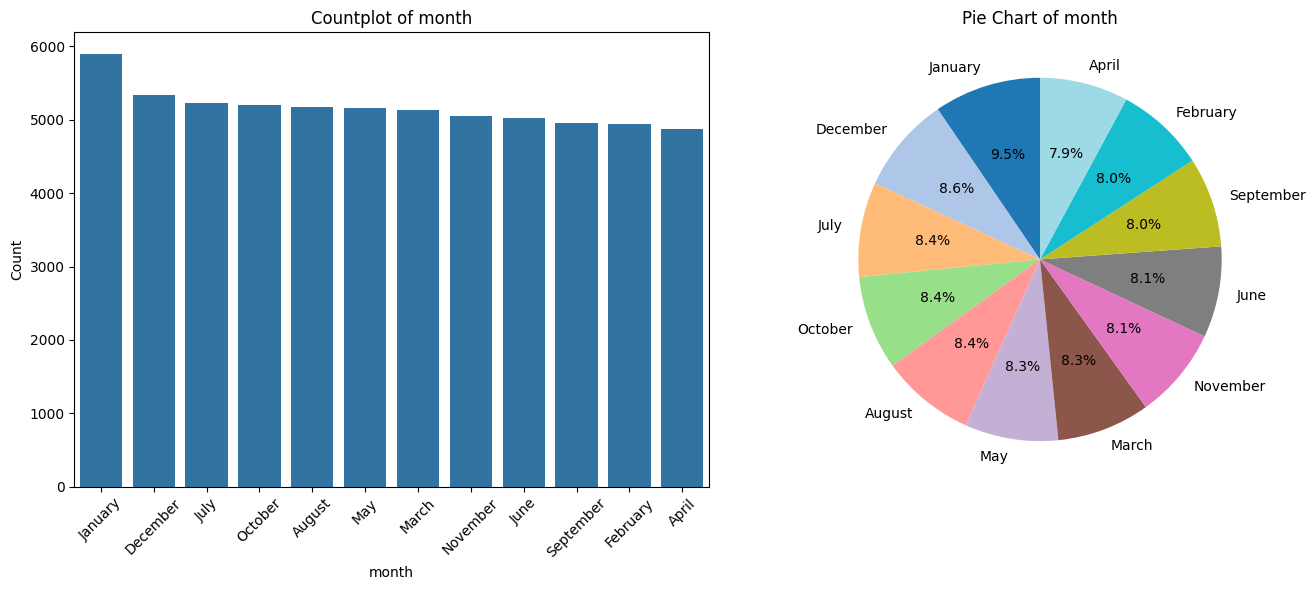

----------------------------------------------------------------------------------------------------
Feature Name: season

Value Counts:
season
Winter          21312
Monsoon         15371
Summer          15056
Post-monsoon    10249
Name: count, dtype: int64

Missing Values: 0


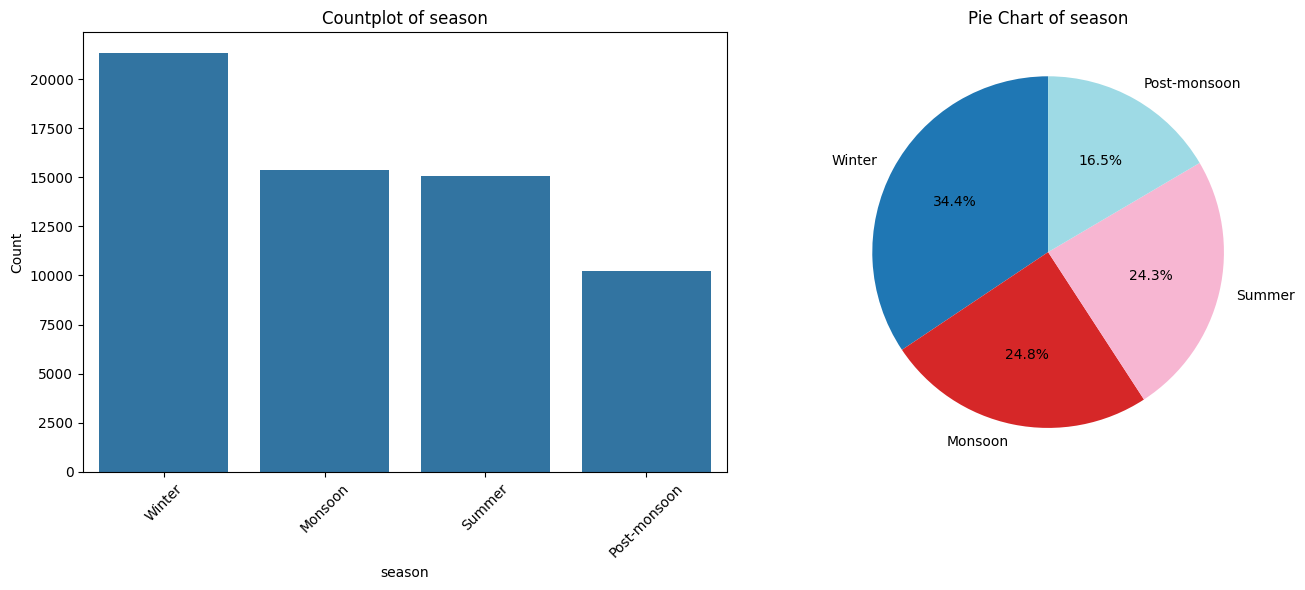

----------------------------------------------------------------------------------------------------
Feature Name: station_name

Value Counts:
station_name
Bhuj-Rudramata        3691
Surat                 3690
Surat / Magdala       3690
Gandhinagar           3688
Ahmadabad             3688
Rajkot                3687
Veraval               3677
Dwarka                3348
Okha                  3348
Porbandar             3346
Naliya                3345
Bhaunagar             3250
Deesa                 2777
Baroda / Vadodara     1491
Baroda Aerodrome      1491
Kandla Aerodrome      1489
New Kandla            1489
Diu                   1489
Mahuva                1489
Vallabh Vidyanagar    1489
Surendranagar         1489
Bulsar                1326
Amreli                1304
Jamnagar              1168
Keshod                1049
Name: count, dtype: int64

Missing Values: 0


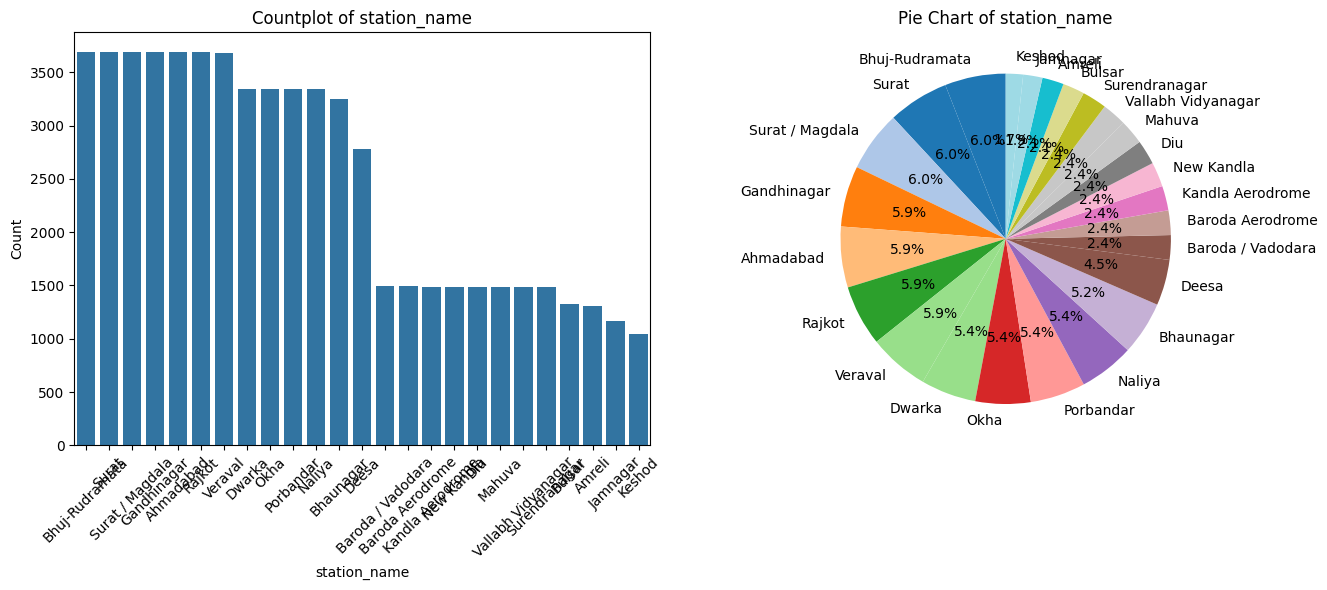

----------------------------------------------------------------------------------------------------
Feature Name: state

Value Counts:
state
GJ    61988
Name: count, dtype: int64

Missing Values: 0


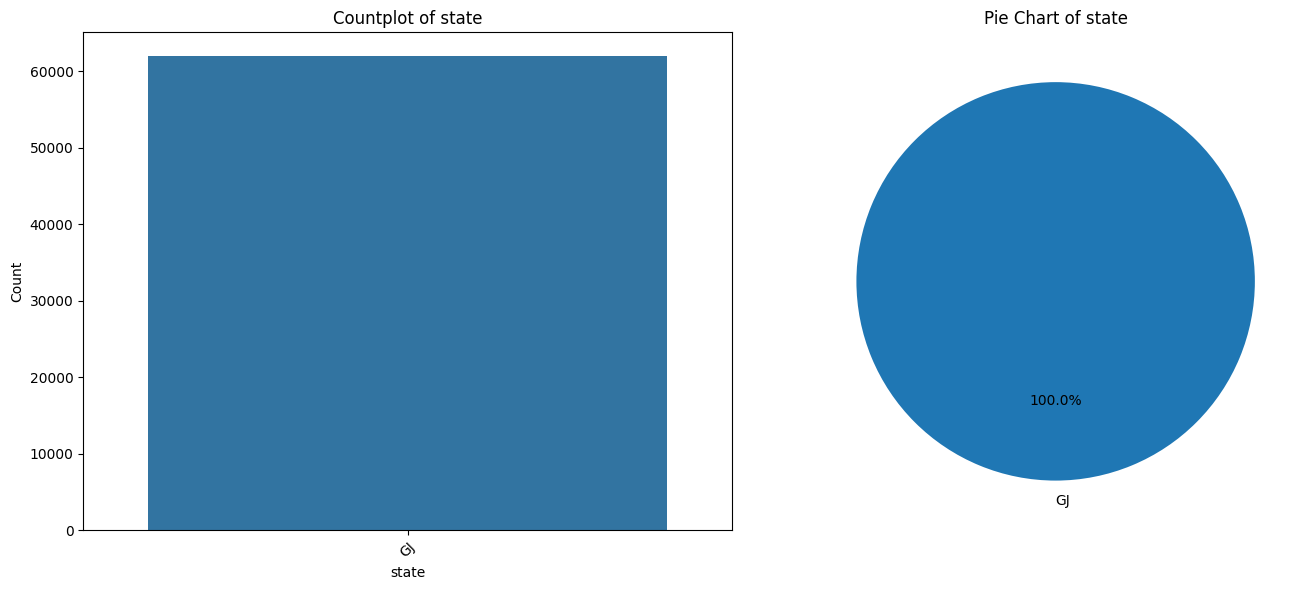

----------------------------------------------------------------------------------------------------
Feature Name: district

Value Counts:
district
Kachchh            10014
Surat               7380
Devbhumi Dwarka     6696
Bhavnagar           4739
Gir Somnath         4726
Gandhinagar         3688
Ahmedabad           3688
Rajkot              3687
Porbandar           3346
Vadodara            2982
Banaskantha         2777
Surendranagar       1489
Anand               1489
Diu                 1489
Valsad              1326
Amreli              1304
Jamnagar            1168
Name: count, dtype: int64

Missing Values: 0


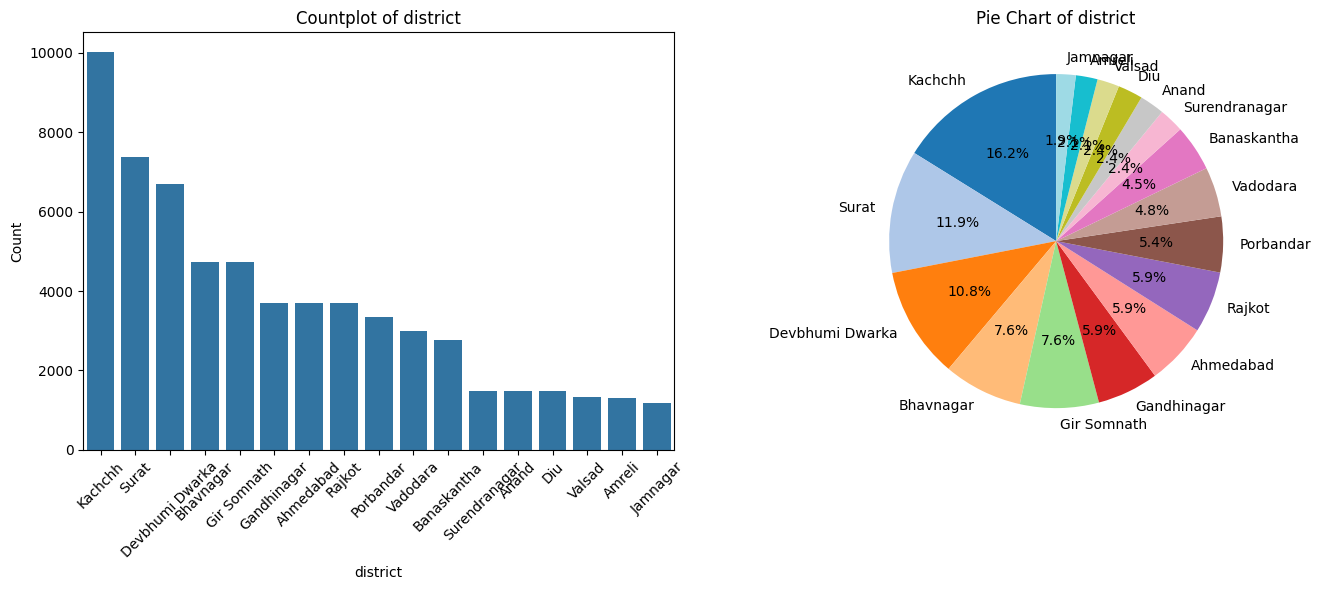

In [22]:
for col in categorical_cols:
    categorical_univariate(dataset, col)

# -------------------------------------------------------------------------------------------
# Observation :

# feature name : month
# 1) each month has approx 4800 to 5900 records and no missing values.

# feature name : season
# 1) winter season have about 21000 records, post-monsoon season have about 10000 records.
# 2) monsoon and summer season have about 15000 records.

# feature name : station_name
# 1) Data collected from about 25 different stations with different districts.

# feature name : district
# 1) Data collected from about 17 different districts from gujarat state.

# -------------------------------------------------------------------------------------------ss

### Bivariate Analysis - Categorical vs Categorical

In [23]:
categorical_cols

Index(['month', 'season', 'station_name', 'state', 'district'], dtype='object')

In [24]:
pd.crosstab(dataset["month"], dataset["season"])

# -------------------------------------------------------------------------------------------
# Observation :
# 1) march is originally summer season but contain winter values.
# -------------------------------------------------------------------------------------------

season     Monsoon  Post-monsoon  Summer  Winter
month                                           
April            0             0    4880       0
August        5181             0       0       0
December         0             0       0    5334
February         0             0       0    4942
January          0             0       0    5898
July          5228             0       0       0
June             0             0    5021       0
March            0             0       0    5138
May              0             0    5155       0
November         0          5051       0       0
October          0          5198       0       0
September     4962             0       0       0

<Axes: xlabel='season', ylabel='month'>

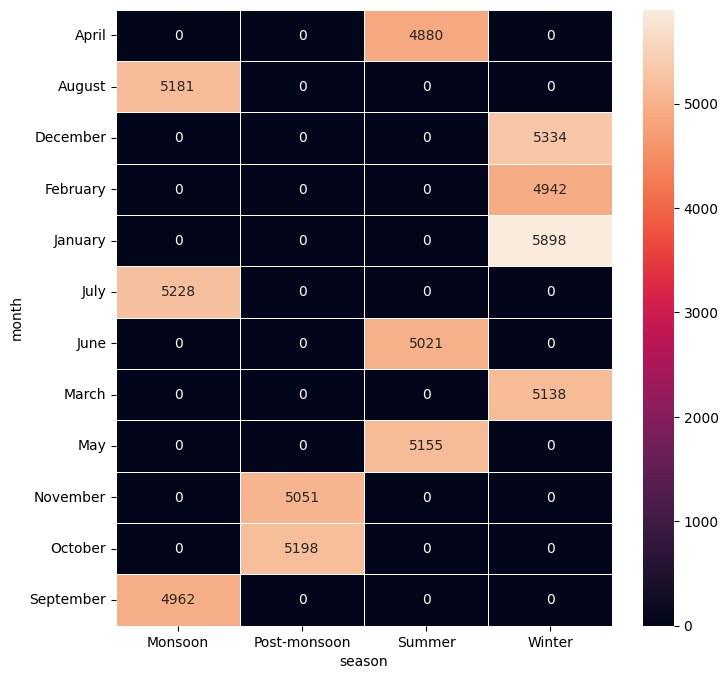

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.crosstab(dataset["month"], dataset["season"]), annot=True, fmt="d", linewidths=0.5, linecolor="white")

In [26]:
pd.crosstab(dataset["month"], dataset["station_name"])

station_name  Ahmadabad  Amreli  Baroda / Vadodara  Baroda Aerodrome  \
month                                                                  
April               294      90                120               120   
August              310     120                120               120   
December            310     122                123               123   
February            293      95                123               123   
January             341     124                154               154   
July                310     119                124               124   
June                300      90                120               120   
March               310      93                124               124   
May                 310      91                123               123   
November            300     120                120               120   
October             310     124                124               124   
September           300     116                116               116   

station_name  Bhaunagar  Bhuj-Rudramata  Bulsar  Deesa  Diu  Dwarka  \
month                                                                 
April               212             299      90    186  120     270   
August              273             310     120    246  120     279   
December            298             308     122    234  122     302   
February            263             293      95    234  123     265   
January             302             341     124    273  154     310   
July                275             310     124    246  124     279   
June                269             300     105    237  120     270   
March               273             310      93    235  124     279   
May                 279             310      93    248  122     279   
November            269             300     120    210  120     270   
October             276             310     124    212  124     279   
September           261             300     116    216  116     266   

station_name  Gandhinagar  Jamnagar  Kandla Aerodrome  Keshod  Mahuva  Naliya  \
month                                                                           
April                 294        90               120      90     120     270   
August                310        89               120      89     120     278   
December              310       122               122      91     122     302   
February              293        95               123      67     123     265   
January               341       124               154      93     154     310   
July                  310        93               124      93     124     279   
June                  300        90               120      90     120     270   
March                 310        93               124      76     124     279   
May                   310        91               122      91     122     279   
November              300       102               120      90     120     270   
October               310        93               124      93     124     279   
September             300        86               116      86     116     264   

station_name  New Kandla  Okha  Porbandar  Rajkot  Surat  Surat / Magdala  \
month                                                                       
April                120   270        270     297    299              299   
August               120   279        279     310    310              310   
December             122   302        302     308    308              308   
February             123   265        265     293    293              293   
January              154   310        310     341    341              341   
July                 124   279        279     310    310              310   
June                 120   270        270     300    300              300   
March                124   279        279     310    310              310   
May                  122   279        279     310    310              310   
November      

<Axes: xlabel='station_name', ylabel='month'>

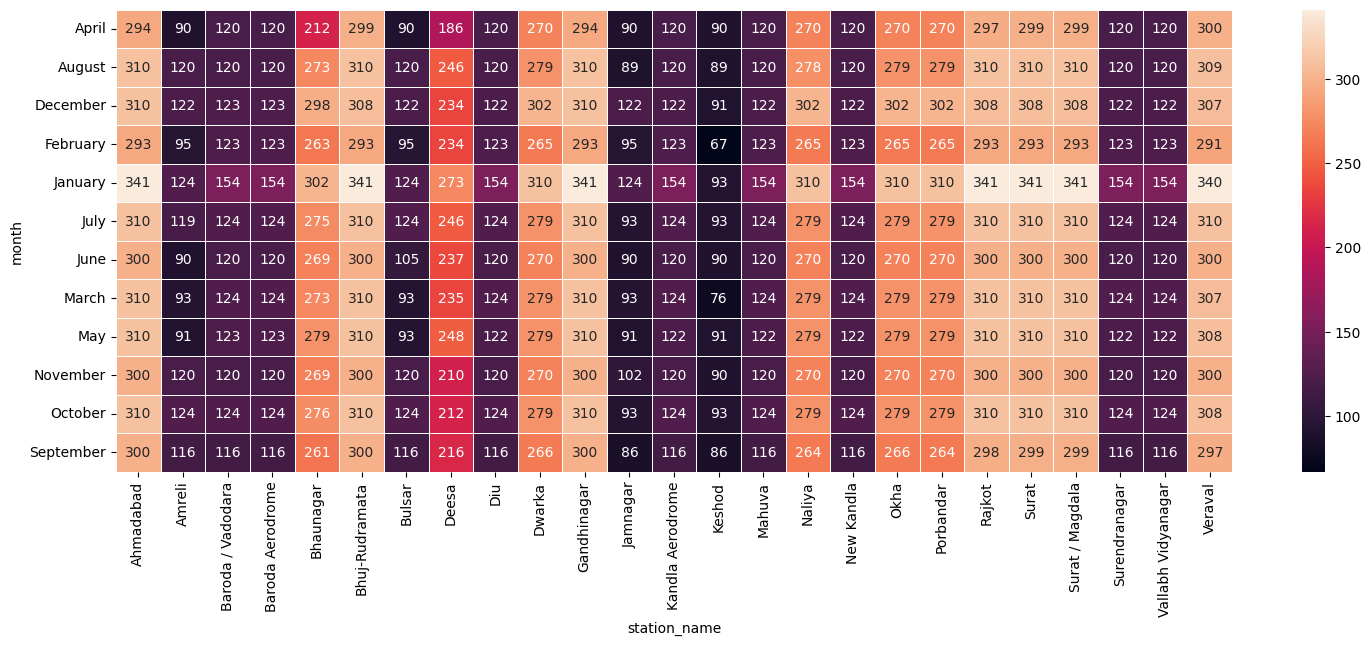

In [27]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.crosstab(dataset["month"], dataset["station_name"]), annot=True, fmt="d", linewidths=0.5, linecolor="white")

In [28]:
pd.crosstab(dataset["month"], dataset["district"])

district   Ahmedabad  Amreli  Anand  Banaskantha  Bhavnagar  Devbhumi Dwarka  \
month                                                                          
April            294      90    120          186        332              540   
August           310     120    120          246        393              558   
December         310     122    122          234        420              604   
February         293      95    123          234        386              530   
January          341     124    154          273        456              620   
July             310     119    124          246        399              558   
June             300      90    120          237        389              540   
March            310      93    124          235        397              558   
May              310      91    122          248        401              558   
November         300     120    120          210        389              540   
October          310     124    124          212        400              558   
September        300     116    116          216        377              532   

district   Diu  Gandhinagar  Gir Somnath  Jamnagar  Kachchh  Porbandar  \
month                                                                    
April      120          294          390        90      809        270   
August     120          310          398        89      828        279   
December   122          310          398       122      854        302   
February   123          293          358        95      804        265   
January    154          341          433       124      959        310   
July       124          310          403        93      837        279   
June       120          300          390        90      810        270   
March      124          310          383        93      837        279   
May        122          310          399        91      833        279   
November   120          300          390       102      810        270   
October    124          310          401        93      837        279   
September  116          300          383        86      796        264   

district   Rajkot  Surat  Surendranagar  Vadodara  Valsad  
month                                                      
April         297    598            120       240      90  
August        310    620            120       240     120  
December      308    616            122       246     122  
February      293    586            123       246      95  
January       341    682            154       308     124  
July          310    620            124       248     124  
June          300    600            120       240     105  
March         310    620            124       248      93  
May           310    620            122       246      93  
November      300    600            120       240     120  
October       310    620            124       248     124  
September     298    598            116       232     116

<Axes: xlabel='district', ylabel='month'>

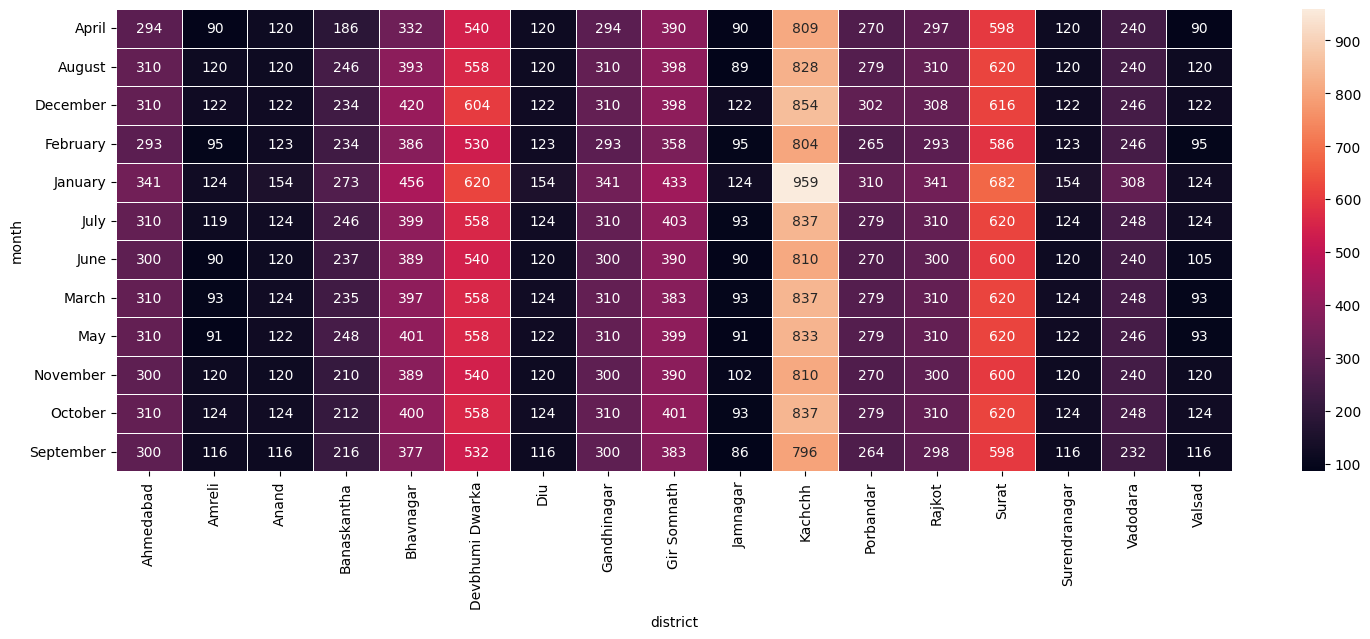

In [29]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.crosstab(dataset["month"], dataset["district"]), annot=True, fmt="d", linewidths=0.5, linecolor="white")

In [30]:
pd.crosstab(dataset["season"], dataset["station_name"])

station_name  Ahmadabad  Amreli  Baroda / Vadodara  Baroda Aerodrome  \
season                                                                 
Monsoon             920     355                360               360   
Post-monsoon        610     244                244               244   
Summer              904     271                363               363   
Winter             1254     434                524               524   

station_name  Bhaunagar  Bhuj-Rudramata  Bulsar  Deesa  Diu  Dwarka  \
season                                                                
Monsoon             809             920     360    708  360     824   
Post-monsoon        545             610     244    422  244     549   
Summer              760             909     288    671  362     819   
Winter             1136            1252     434    976  523    1156   

station_name  Gandhinagar  Jamnagar  Kandla Aerodrome  Keshod  Mahuva  Naliya  \
season                                                                          
Monsoon               920       268               360     268     360     821   
Post-monsoon          610       195               244     183     244     549   
Summer                904       271               362     271     362     819   
Winter               1254       434               523     327     523    1156   

station_name  New Kandla  Okha  Porbandar  Rajkot  Surat  Surat / Magdala  \
season                                                                      
Monsoon              360   824        822     918    919              919   
Post-monsoon         244   549        549     610    610              610   
Summer               362   819        819     907    909              909   
Winter               523  1156       1156    1252   1252             1252   

station_name  Surendranagar  Vallabh Vidyanagar  Veraval  
season                                                    
Monsoon                 360                 360      916  
Post-monsoon            244                 244      608  
Summer                  362                 362      908  
Winter                  523                 523     1245

<Axes: xlabel='station_name', ylabel='season'>

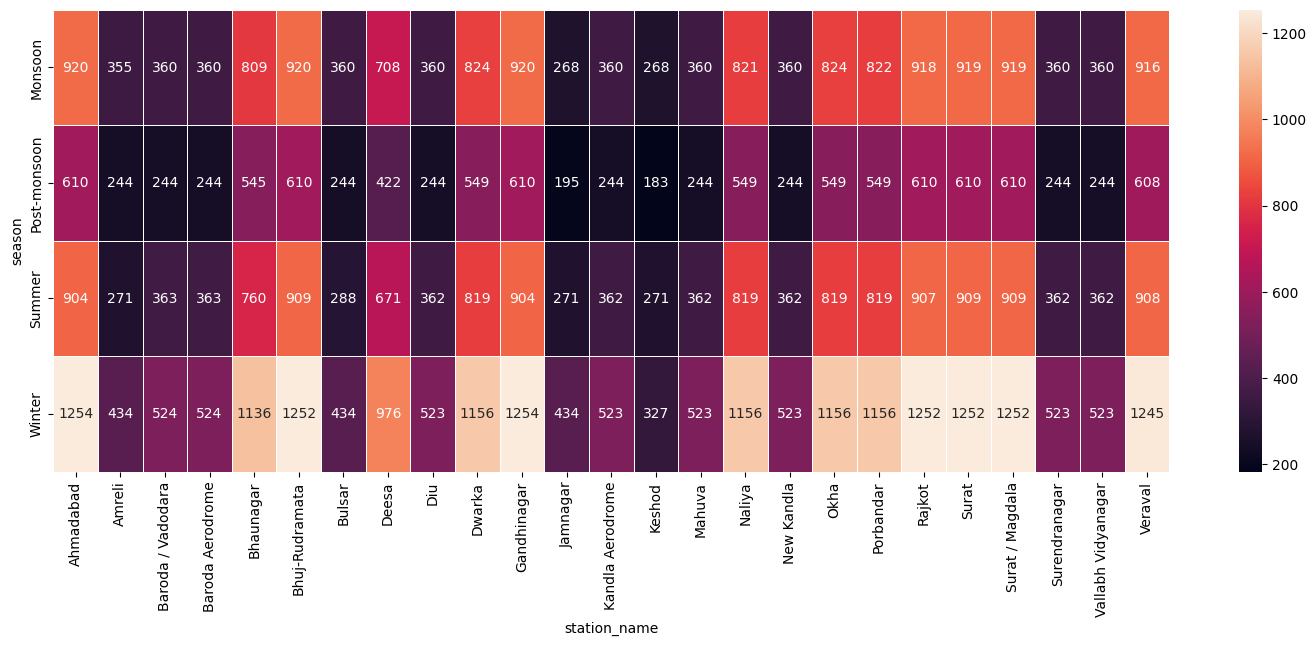

In [31]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.crosstab(dataset["season"], dataset["station_name"]), annot=True, fmt="d", linewidths=0.5, linecolor="white")

In [32]:
pd.crosstab(dataset["season"], dataset["district"])

district      Ahmedabad  Amreli  Anand  Banaskantha  Bhavnagar  \
season                                                           
Monsoon             920     355    360          708       1169   
Post-monsoon        610     244    244          422        789   
Summer              904     271    362          671       1122   
Winter             1254     434    523          976       1659   

district      Devbhumi Dwarka  Diu  Gandhinagar  Gir Somnath  Jamnagar  \
season                                                                   
Monsoon                  1648  360          920         1184       268   
Post-monsoon             1098  244          610          791       195   
Summer                   1638  362          904         1179       271   
Winter                   2312  523         1254         1572       434   

district      Kachchh  Porbandar  Rajkot  Surat  Surendranagar  Vadodara  \
season                                                                     
Monsoon          2461        822     918   1838            360       720   
Post-monsoon     1647        549     610   1220            244       488   
Summer           2452        819     907   1818            362       726   
Winter           3454       1156    1252   2504            523      1048   

district      Valsad  
season                
Monsoon          360  
Post-monsoon     244  
Summer           288  
Winter           434

<Axes: xlabel='district', ylabel='season'>

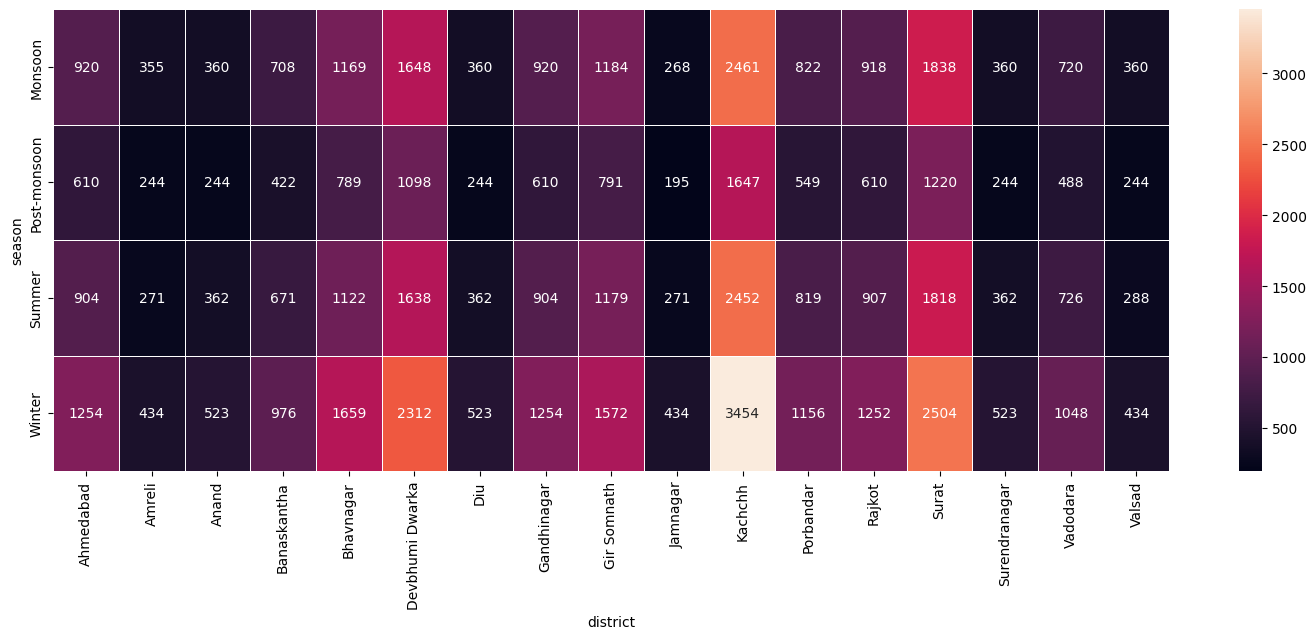

In [33]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.crosstab(dataset["season"], dataset["district"]), annot=True, fmt="d", linewidths=0.5, linecolor="white")

### Bivariate Analysis - Numerical vs Numerical

In [34]:
col1 = "rainfall"
col2 = numeric_cols.drop("rainfall")

num_col_combination = []

for col in col2:
    num_col_combination.append((col, col1))

num_col_combination

[('avg_temp', 'rainfall'),
 ('min_temp', 'rainfall'),
 ('max_temp', 'rainfall'),
 ('wind_speed', 'rainfall'),
 ('air_pressure', 'rainfall'),
 ('elevation', 'rainfall'),
 ('latitude', 'rainfall'),
 ('longitude', 'rainfall')]

In [35]:
def num_num_bivariate(dataset, col1, col2):

    print("-" * 100)
    print(f"Feature Name: {col1} and {col2}\n")

    fig, ax = plt.subplots(1,1)
    sns.scatterplot(data = dataset, x = col1, y = col2)
    ax.set_title(f"Scatter Plot of {col1} and {col2}")
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

----------------------------------------------------------------------------------------------------
Feature Name: avg_temp and rainfall



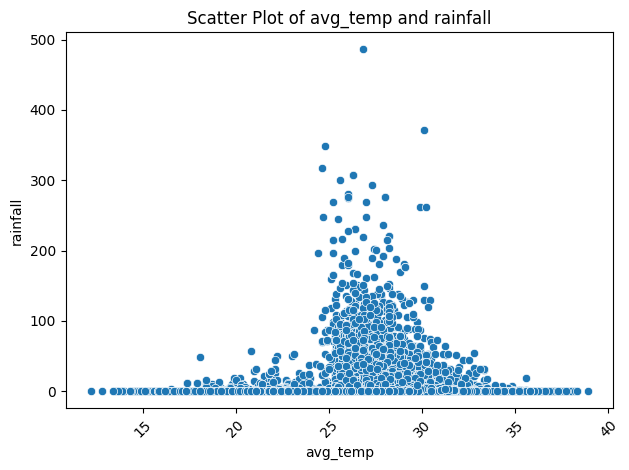

----------------------------------------------------------------------------------------------------
Feature Name: min_temp and rainfall



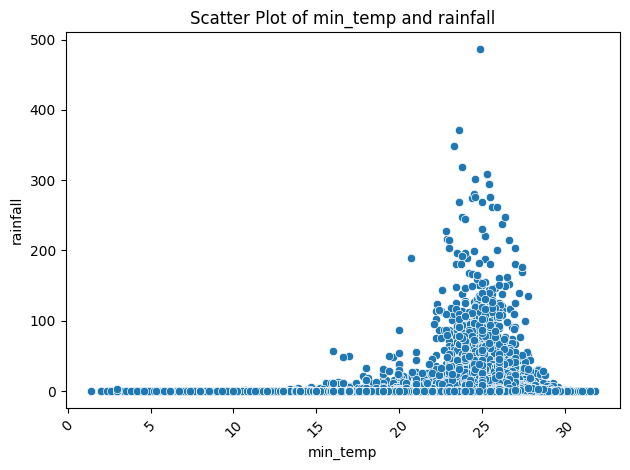

----------------------------------------------------------------------------------------------------
Feature Name: max_temp and rainfall



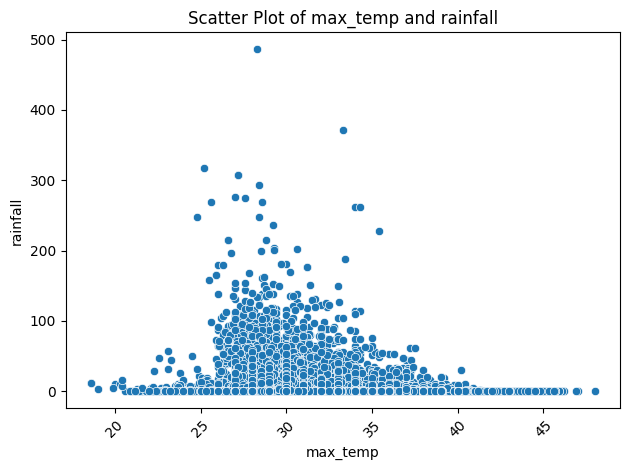

----------------------------------------------------------------------------------------------------
Feature Name: wind_speed and rainfall



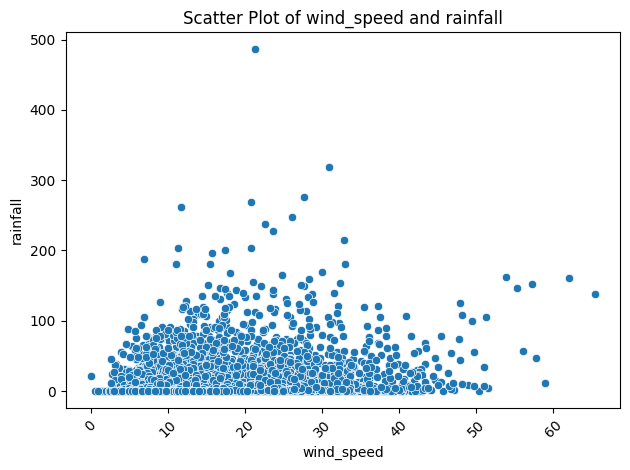

----------------------------------------------------------------------------------------------------
Feature Name: air_pressure and rainfall



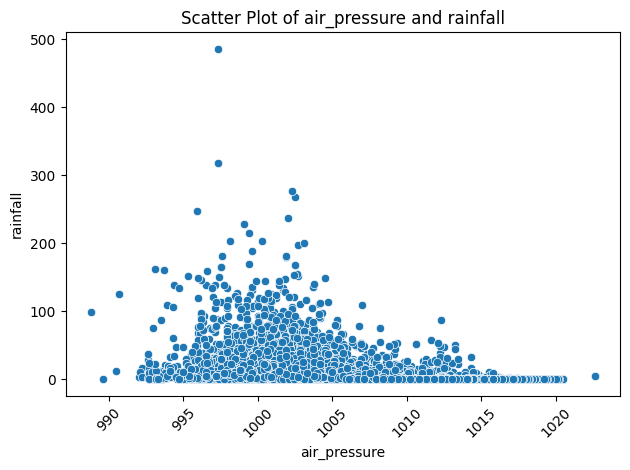

----------------------------------------------------------------------------------------------------
Feature Name: elevation and rainfall



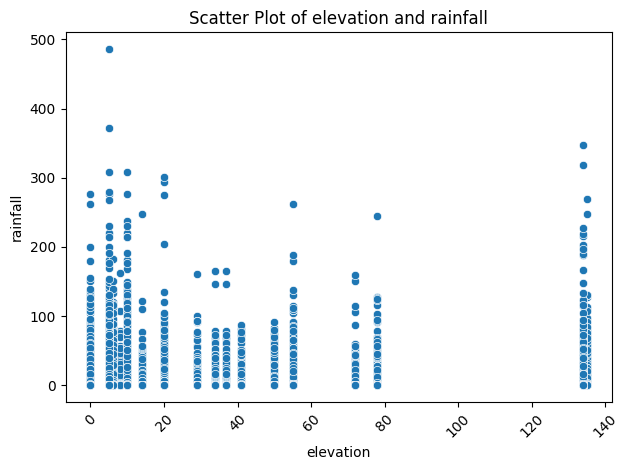

----------------------------------------------------------------------------------------------------
Feature Name: latitude and rainfall



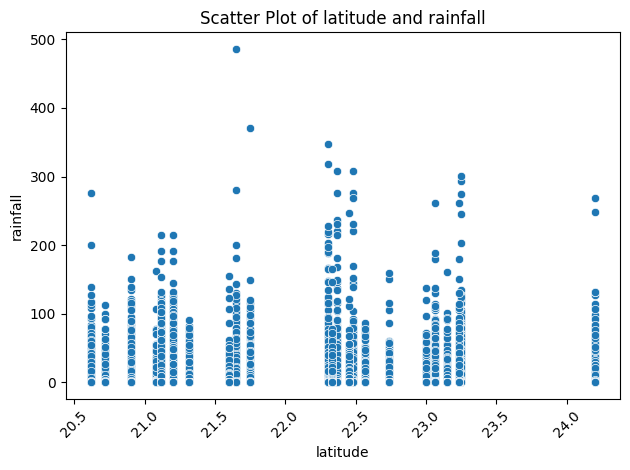

----------------------------------------------------------------------------------------------------
Feature Name: longitude and rainfall



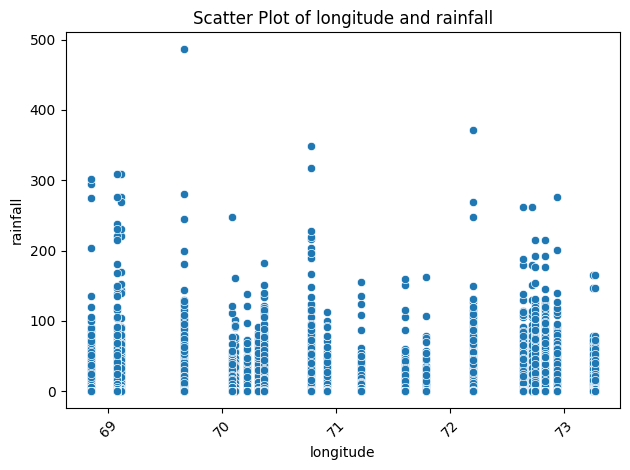

In [36]:
for col1, col2 in num_col_combination:
    num_num_bivariate(dataset, col1, col2)


# -------------------------------------------------------------------------------------------
# Observation :

# feature name : avg_temp and rainfall
# 1) rainfall values varies from 0 to 500 with respective of avg_temp and most of rainfall values are 0.
# 2) avg_temp values range from 12 to 40 degree celsius. 
# 3) There is no direct relation between avg_temp and rainfall.
# 4) avg_temp contains most values in range of 25 to 33 degree celsius.

# feature name : min_temp and rainfall
# 1) min_temp values range from 1 to 32 degree celsius and most of rainfall values are 0.
# 2) min_temp contains most values in range of 20 to 30 degree celsius.

# feature name : max_temp and rainfall
# 1) max_temp values range from 18 to 50 degree celsius.
# 2) max_temp most values in range of 25 to 35 with resp to rainfall.

# feature name : wind_speed and rainfall
# 1) wind_speed values range from 0 to 65 and most values in range of 5 to 35.

# feature name : air_pressure and rainfall
# 1) air_pressure values range from 988 to 1022 and most values fall in range of 995 to 1005.

# feature name : elevation and rainfall
# 1) elevation values range from 0 to 135 and elevation most of values less than or equal to 80.

# -------------------------------------------------------------------------------------------

### Bivariate Analysis - Categorical vs Numerical 

In [37]:
col1 = categorical_cols
col2 = "rainfall"

num_cat_combination = []

for col in col1:
    num_cat_combination.append((col, col2))

num_cat_combination

[('month', 'rainfall'),
 ('season', 'rainfall'),
 ('station_name', 'rainfall'),
 ('state', 'rainfall'),
 ('district', 'rainfall')]

In [38]:
def num_cat_bivariate(dataset, col1, col2):

    print("-" * 100)
    print(f"Feature Name: {col1} and {col2}\n")

    # 2. Create plots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Bar Plot
    sns.barplot(x=col1, y=col2, data=dataset, ax=ax[0])
    ax[0].set_title(f"Barplot of {col1} and {col2}")
    ax[0].set_xlabel(col1)
    ax[0].set_ylabel(col2)
    ax[0].tick_params(axis='x', rotation=45)

    # Box Plot
    sns.boxplot(x=col1, y=col2, data=dataset, ax=ax[1])
    ax[1].set_title(f"Boxplot of {col1} and {col2}")
    ax[1].set_xlabel(col1)
    ax[1].set_ylabel("")  # remove y-label
    ax[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


----------------------------------------------------------------------------------------------------
Feature Name: month and rainfall



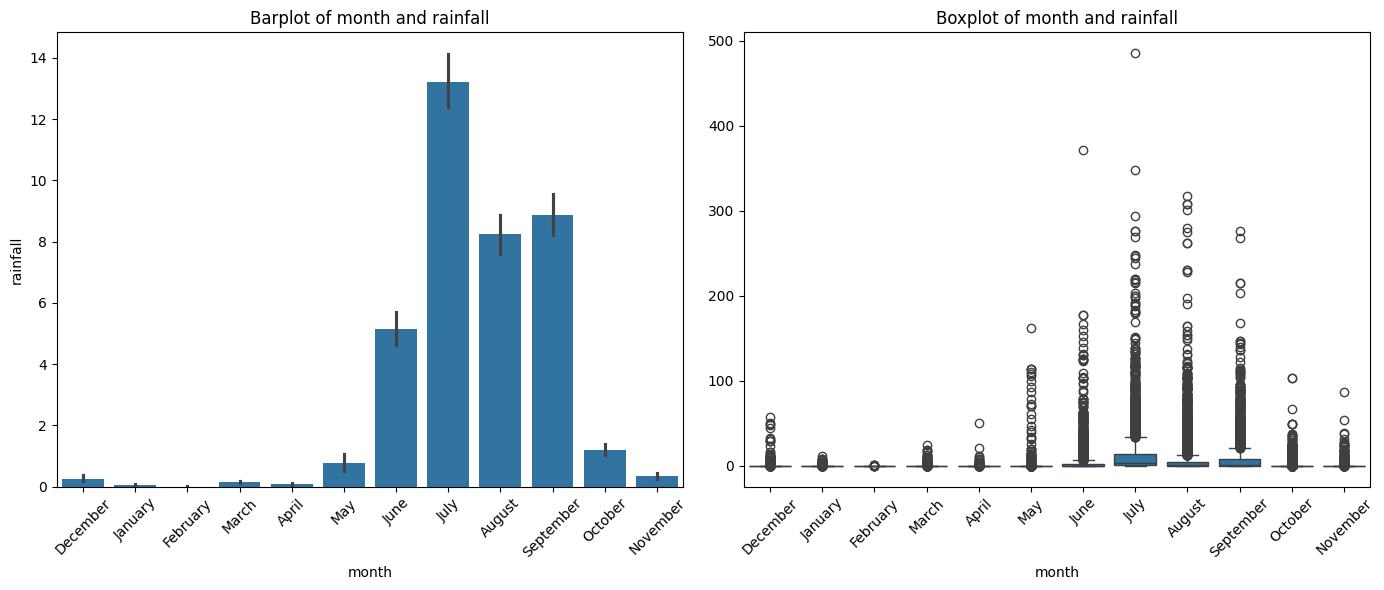

----------------------------------------------------------------------------------------------------
Feature Name: season and rainfall



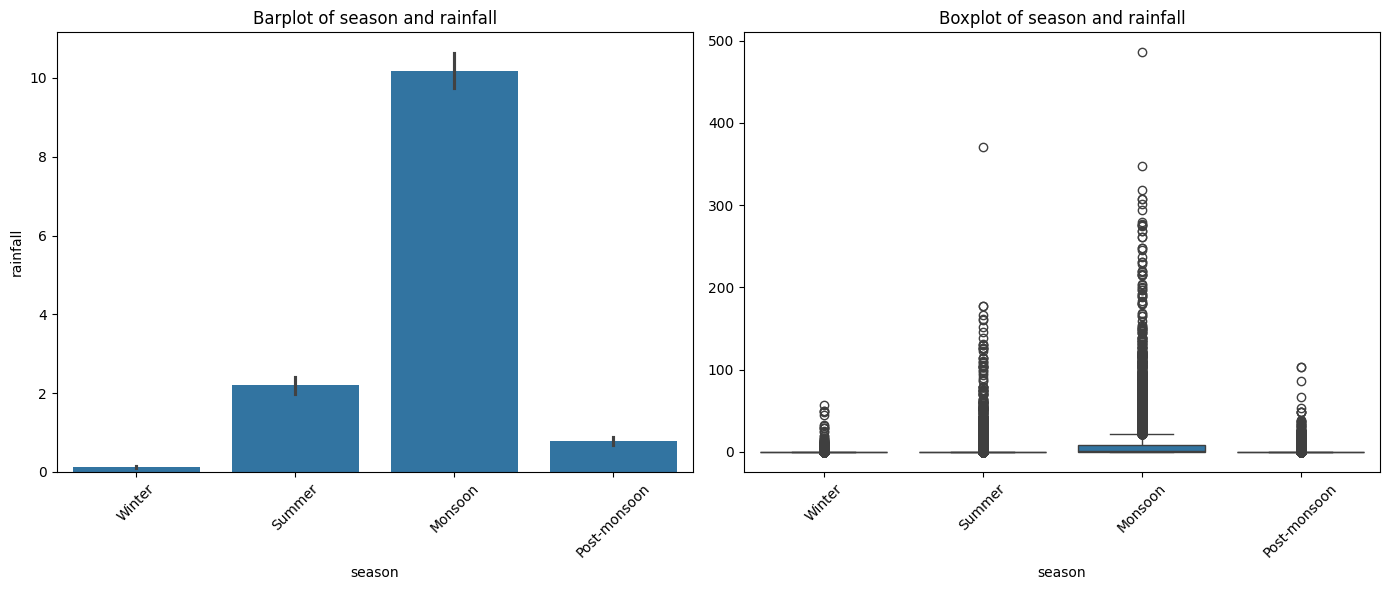

----------------------------------------------------------------------------------------------------
Feature Name: station_name and rainfall



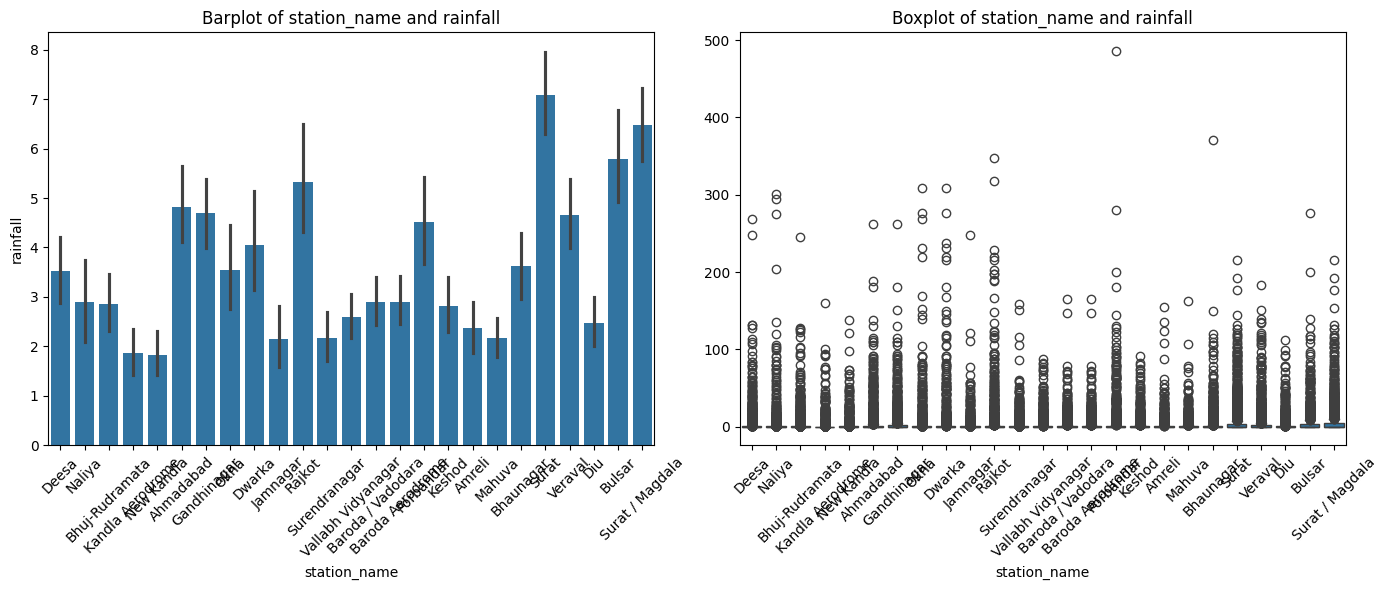

----------------------------------------------------------------------------------------------------
Feature Name: state and rainfall



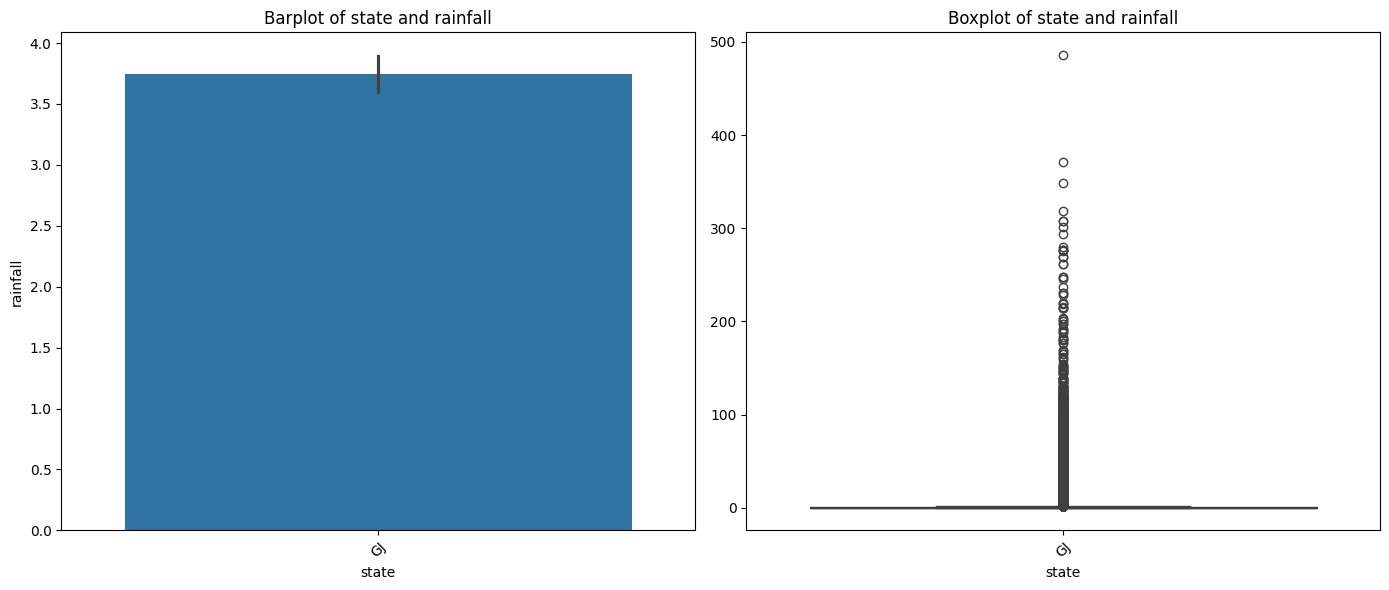

----------------------------------------------------------------------------------------------------
Feature Name: district and rainfall



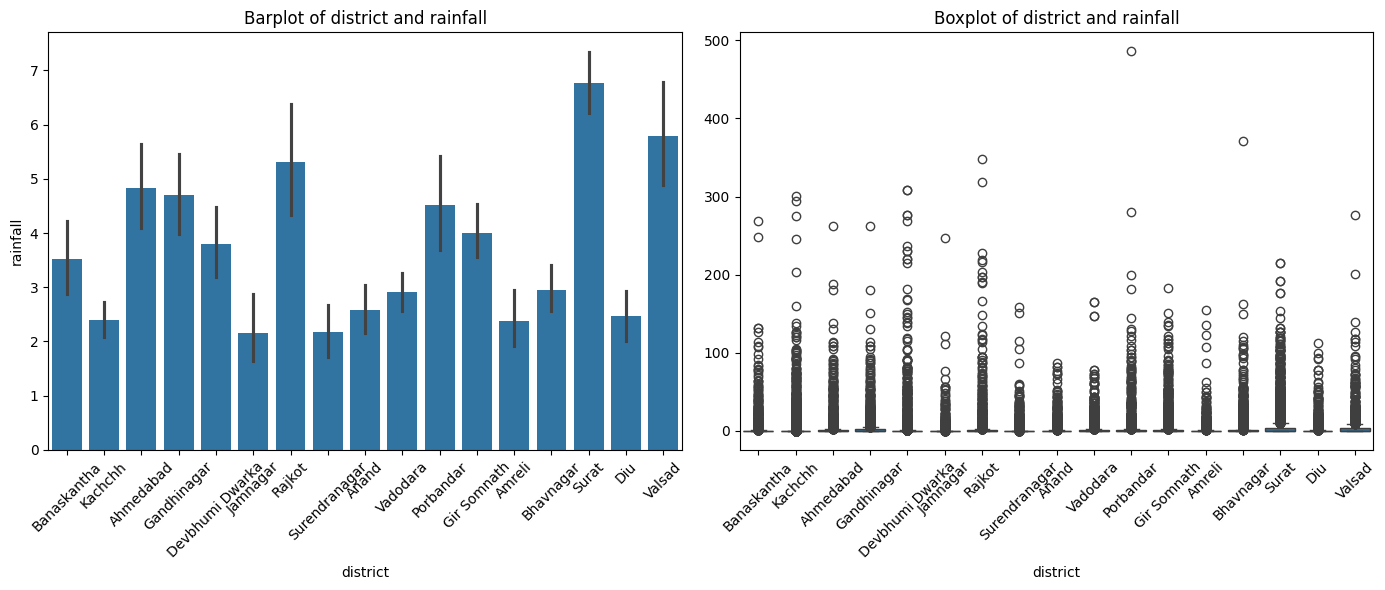

In [39]:
for col1, col2 in num_cat_combination:
    num_cat_bivariate(dataset, col1, col2)


# -------------------------------------------------------------------------------------------
# Observation :

# feature name : month and rainfall
# 1) most of rainfall in june to september months which is valid.
# 2) most of months values are near to 0. for that reason we can outliers in each month.

# feature name : season and rainfall
# 1) summer, winter and post-monsoon seasons contains most of values near to 0 for that reason this season have outliers.
# 2) monsoon season also contains outliers by looking boxplot.

# feature name : station_name and rainfall
# 1) almost every station have most of values near to 0.

# feature name : district and rainfall
# 1) most of districts rainfall values near to 0.

# -------------------------------------------------------------------------------------------

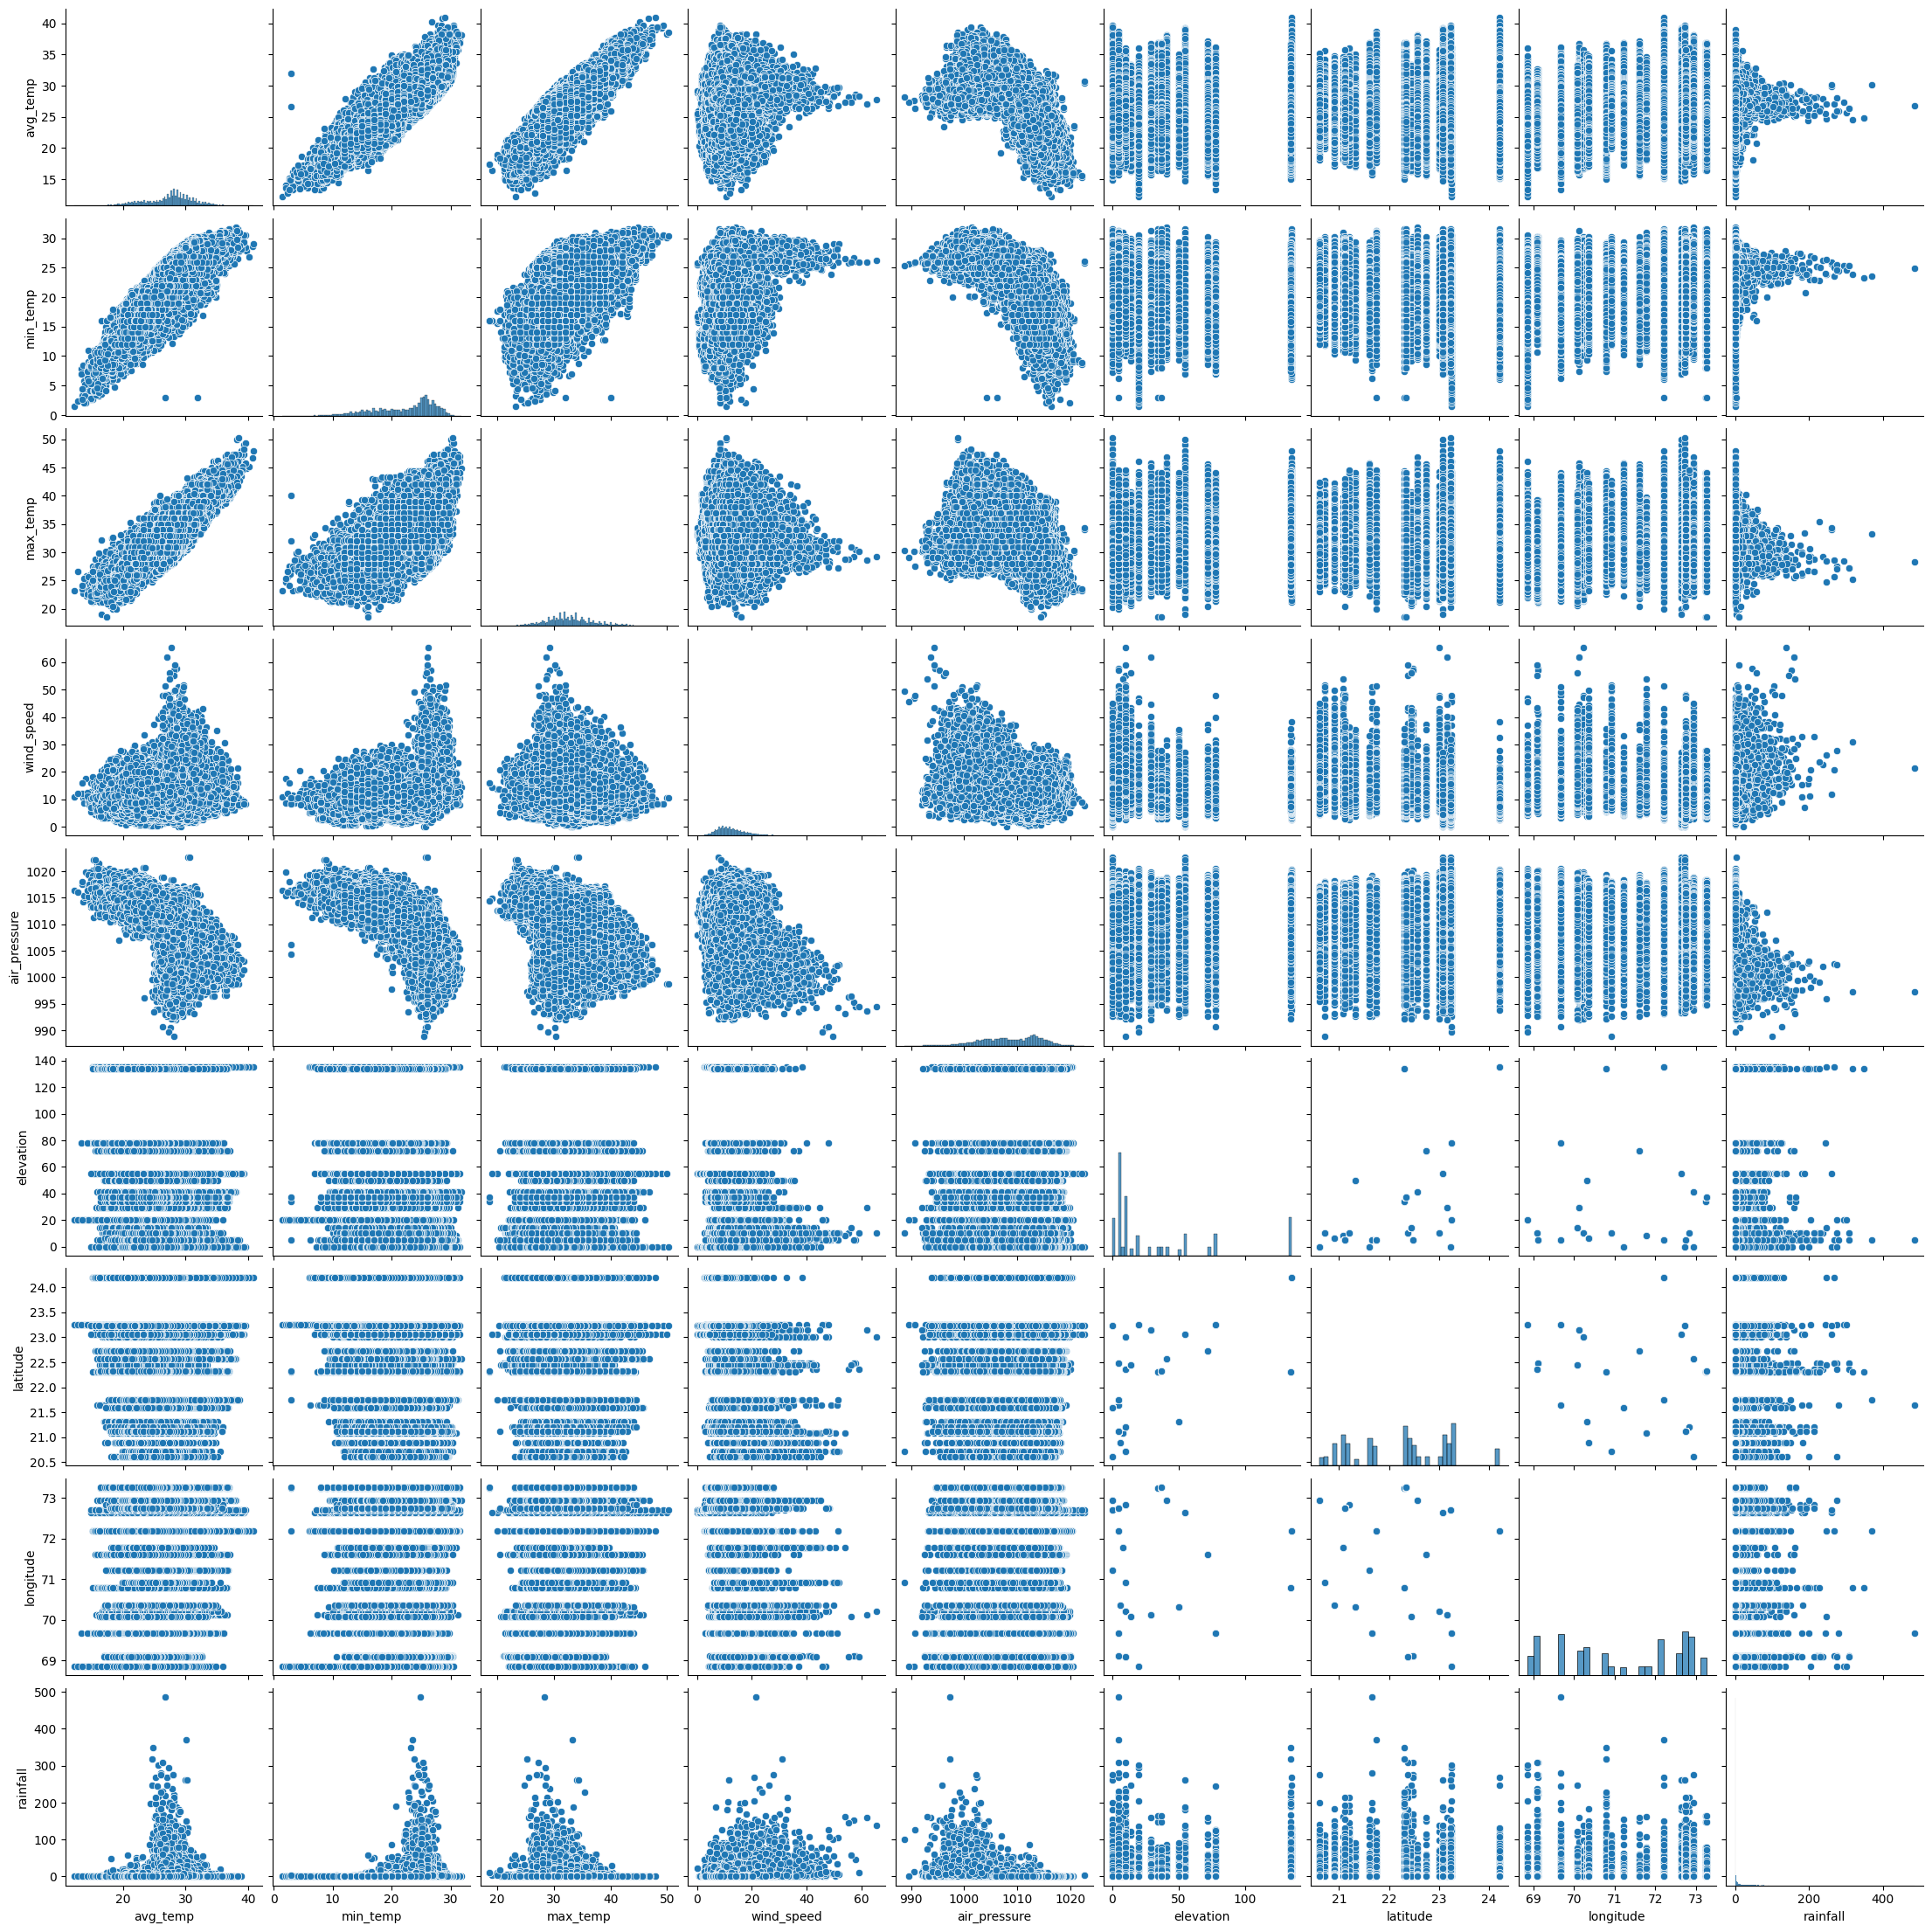

In [40]:
sns.pairplot(dataset)

In [41]:
corr = dataset[numeric_cols].corr()
corr

avg_temp  min_temp  max_temp  wind_speed  air_pressure  \
avg_temp      1.000000  0.866765  0.840427    0.194803     -0.658164   
min_temp      0.866765  1.000000  0.526116    0.395140     -0.785329   
max_temp      0.840427  0.526116  1.000000   -0.074029     -0.347571   
wind_speed    0.194803  0.395140 -0.074029    1.000000     -0.378983   
air_pressure -0.658164 -0.785329 -0.347571   -0.378983      1.000000   
elevation     0.030257 -0.109483  0.150771   -0.239018     -0.008313   
latitude      0.000580 -0.118924  0.110273   -0.266596     -0.016067   
longitude     0.108665 -0.001591  0.186587   -0.355586     -0.045849   
rainfall      0.017693  0.131569 -0.140284    0.138396     -0.315403   

              elevation  latitude  longitude  rainfall  
avg_temp       0.030257  0.000580   0.108665  0.017693  
min_temp      -0.109483 -0.118924  -0.001591  0.131569  
max_temp       0.150771  0.110273   0.186587 -0.140284  
wind_speed    -0.239018 -0.266596  -0.355586  0.138396  
air_pressure  -0.008313 -0.016067  -0.045849 -0.315403  
elevation      1.000000  0.510552   0.032153 -0.006880  
latitude       0.510552  1.000000  -0.146295 -0.036494  
longitude      0.032153 -0.146295   1.000000  0.032729  
rainfall      -0.006880 -0.036494   0.032729  1.000000

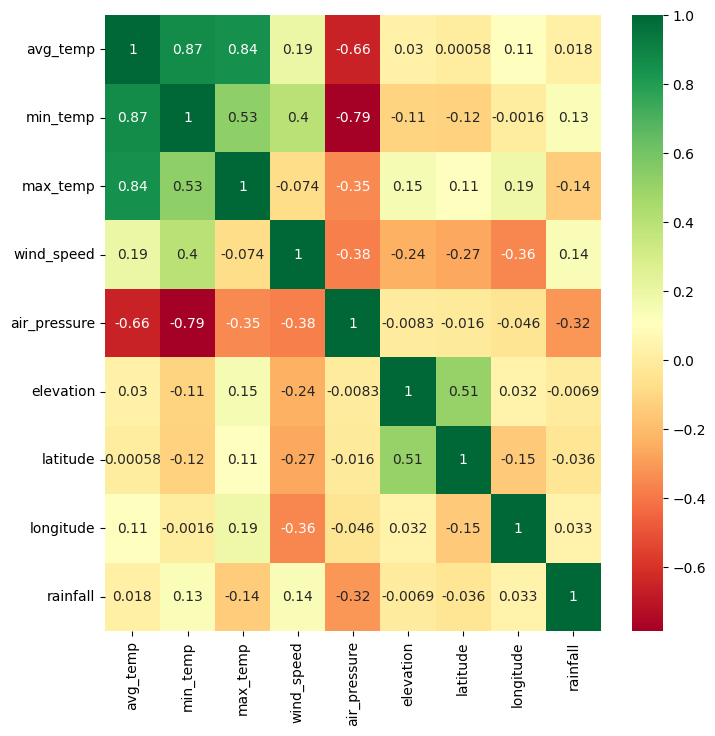

In [42]:
# plot co-relation in heat map to check multi-co-linearility between features
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

### date_of_record

In [43]:
def dt_univar_plots(dataset, var, target=None, bins="auto"):
  fig, ax = plt.subplots(1, 2, figsize=(15, 6))

  # histogram
  sns.histplot(
    data=dataset,
    x=var,
    bins=bins,
    color="#1973bd",
    ax=ax[0]
  )
  ax[0].set_title(f"Histogram for Rainfall in {dataset['date_of_record'].dt.year.values[0]}")
  ax[0].tick_params(axis='x', rotation=45)

  # line-plot
  sns.lineplot(
    data=dataset,
    x=var,
    y=target,
    color="#d92b2b",
    ax=ax[1]
  )
  ax[1].set_title(f"Line Plot for Rainfall in {dataset['date_of_record'].dt.year.values[0]}")
  ax[1].tick_params(axis='x', rotation=45)

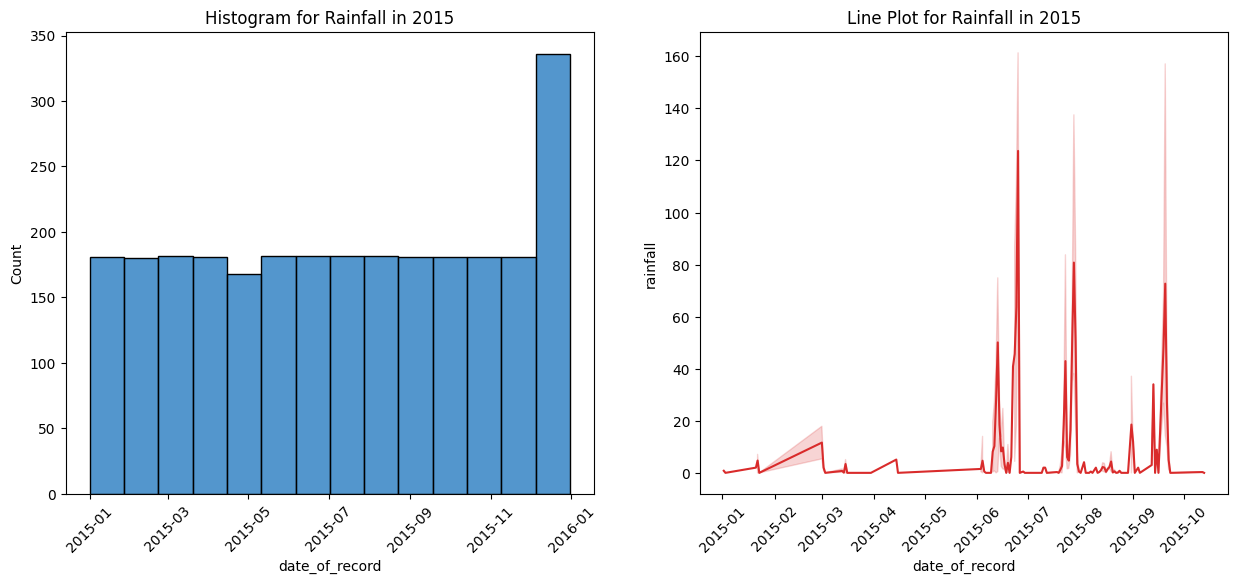

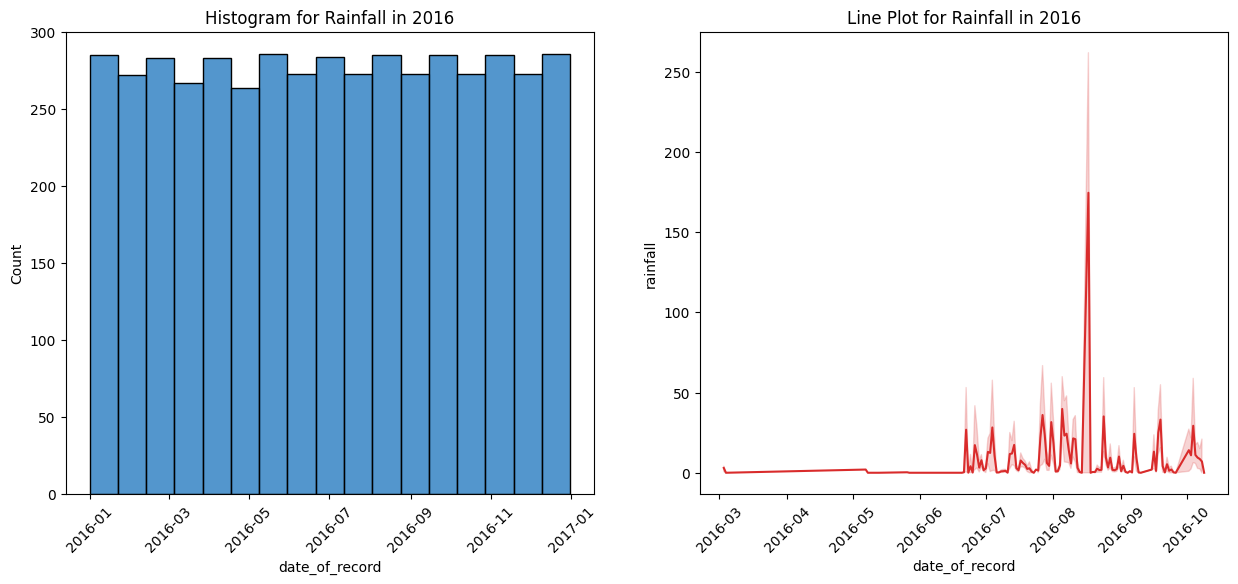

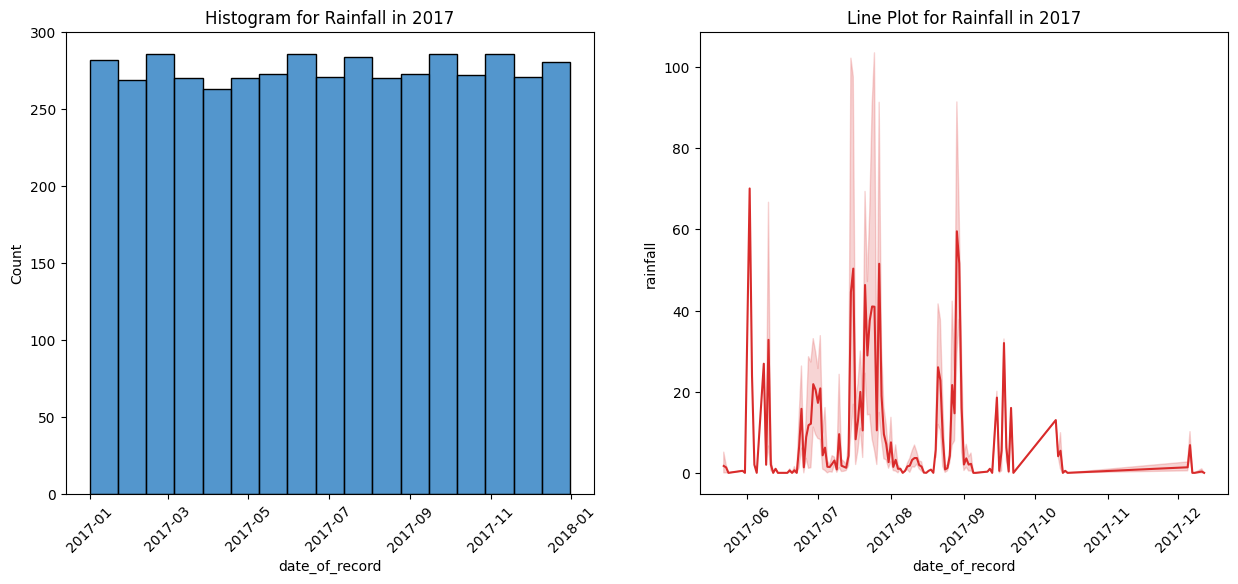

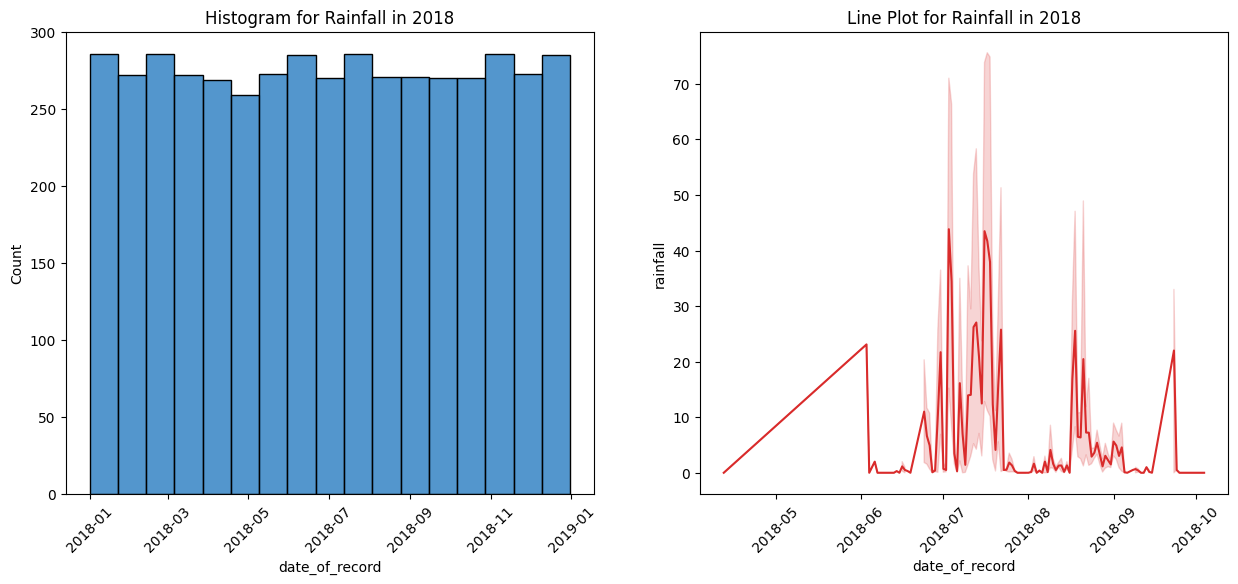

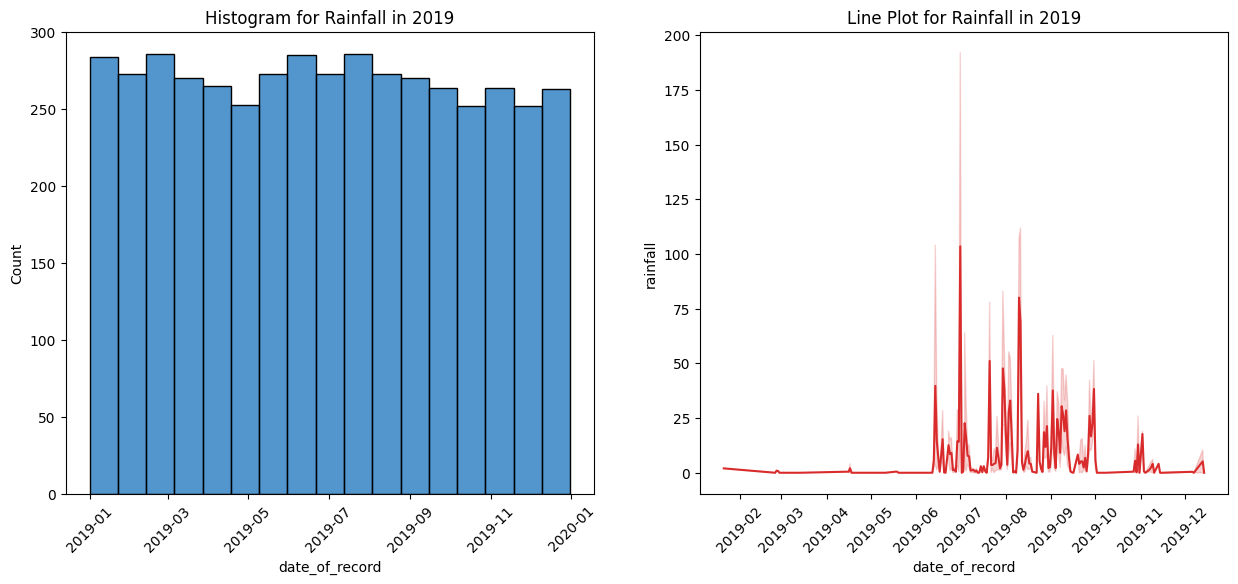

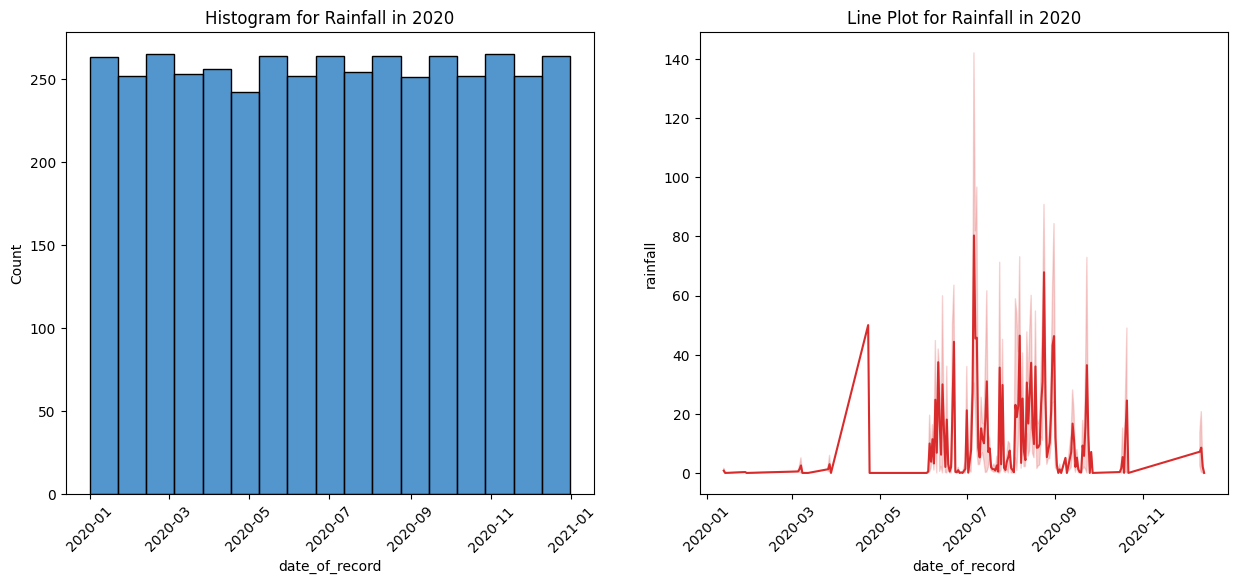

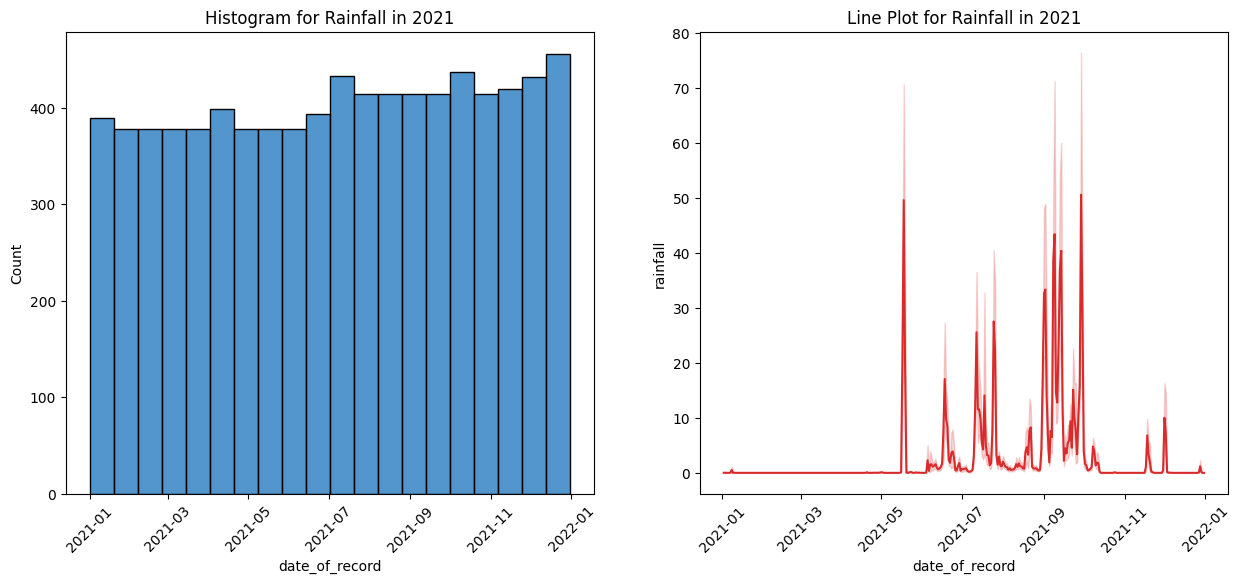

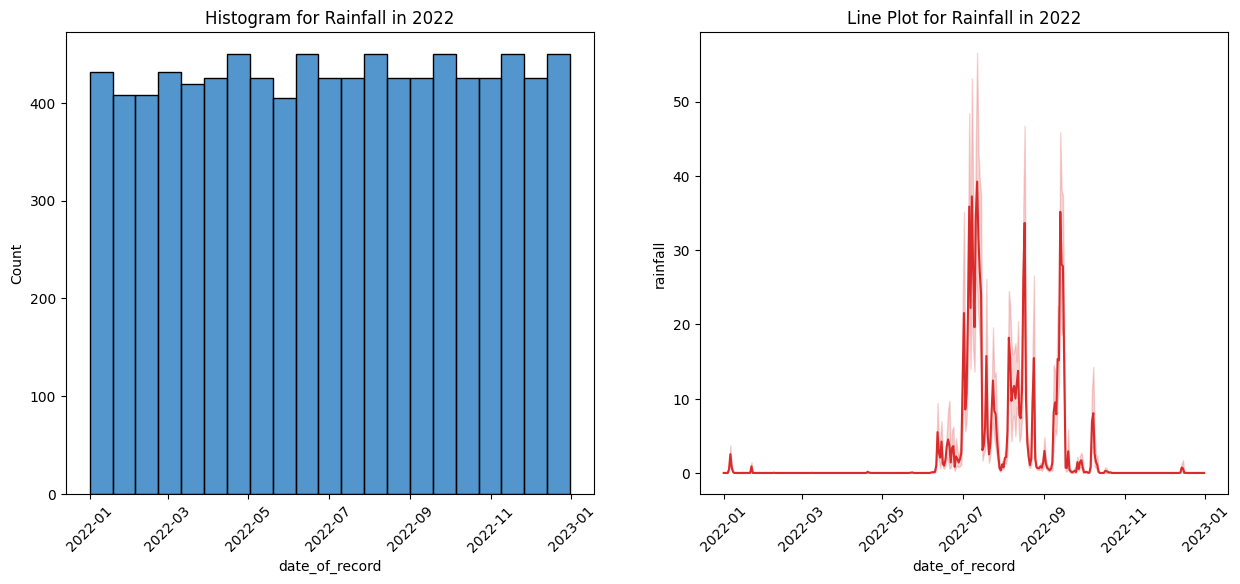

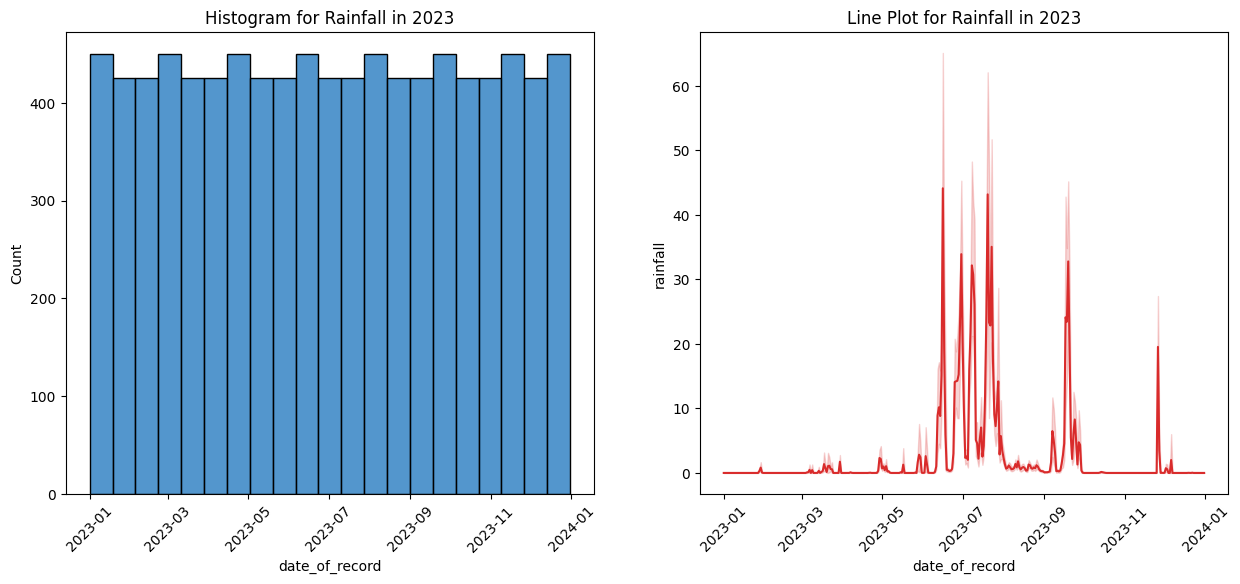

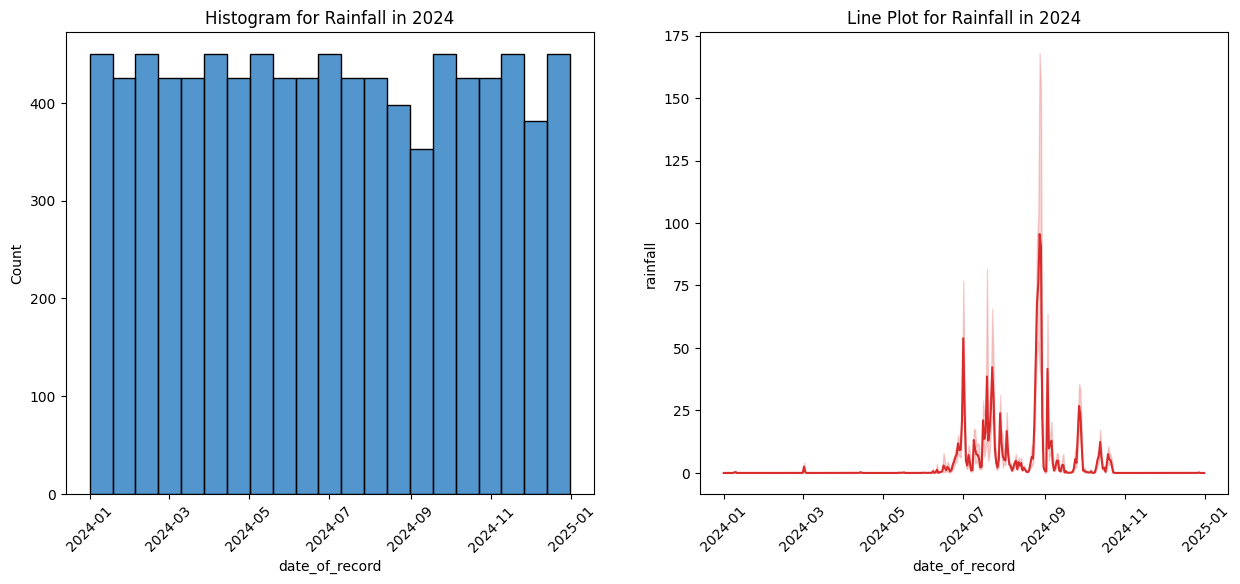

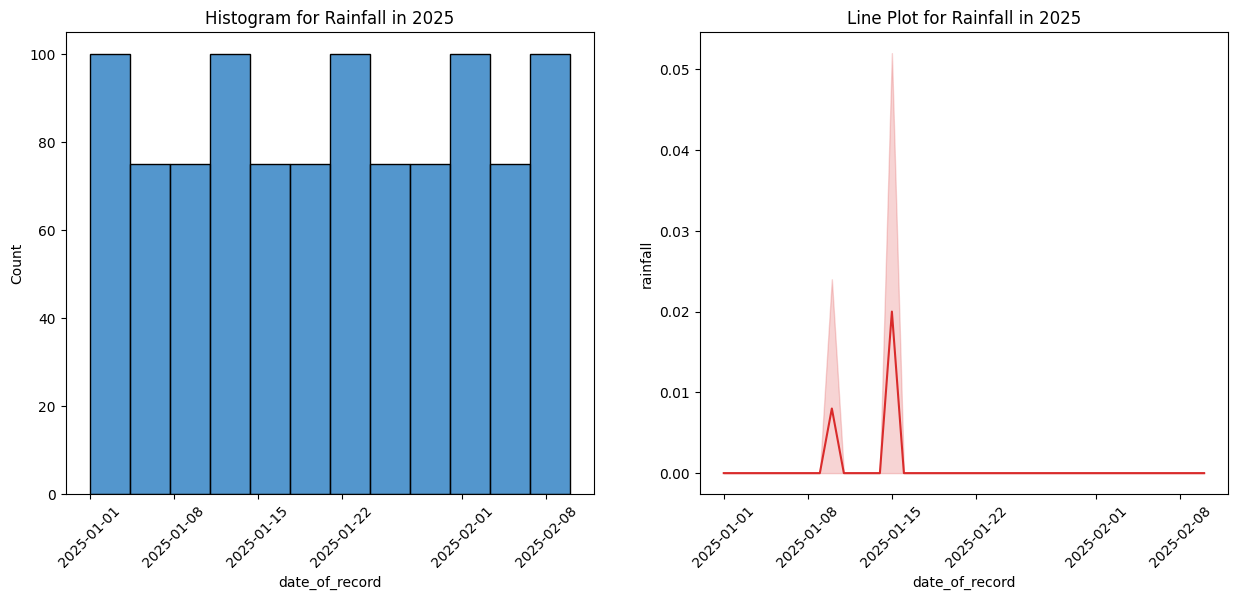

In [44]:
for grp, data in dataset.groupby(dataset["date_of_record"].dt.year):
    dt_univar_plots(data, "date_of_record", "rainfall")